# 주제, 계획

In [5]:
model.predict('A팀 이름','B팀 이름')

"A 팀" 이 승리할 경기입니다 
해당 경기 승리 예측 성공률 : N%


NameError: name 'model' is not defined

In [4]:
print('"A 팀" 이 승리할 경기입니다 \n해당 경기 승리 예측 성공률 : N%')

"A 팀" 이 승리할 경기입니다 
해당 경기 승리 예측 성공률 : N%


In [ ]:
season_model.predict('시즌 현재 상황 테이블')

In [ ]:
print('''현재 상황에 플레이 오프(상위 팀 매치)에 올라갈 팀은 
      "A 팀"
      "B 팀"
      "D 팀"
      "S 팀"
      .
      .
      .
      "H 팀" 이 진출 예상됩니다
      본 예측은  : N%''')

# 데이터 수집, 전처리

## Traditional 스탯

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import numpy as np
import pandas as pd
from datetime import datetime
import time
import math
import datetime


driver = webdriver.Chrome('chromedriver.exe')
url1 = 'https://www.nba.com/stats/teams/traditional?Season='
NBA_Traditional_df = pd.DataFrame()
year_start = 11
year_finish= 23

start = time.time()
for i in range(year_start,year_finish):
    url2 = f'20{i}-{i+1}'
    url = url1 + url2

    driver.get(url)

    time.sleep(3)

    team_table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz')

    team_columns = team_table.text.split('\n')[0].strip().split(' ')
    team_rank = team_table.text.split('\n')[1::3]
    team_names = team_table.text.split('\n')[2::3]
    team_valuess = team_table.text.split('\n')[3::3]


    team_values = []
    for i in team_valuess:
        team_values.append(i.split(' '))


    df = pd.DataFrame(data = team_values, index = team_rank, columns = team_columns[1:])
    df.insert(0,'Team',team_names)
    nba_team_df = df.reset_index().rename({'index': 'Rank'},axis=1)
    nba_team_df['SEASON'] = url2
    
    NBA_Traditional_df  = pd.concat([NBA_Traditional_df,nba_team_df])
    print(url2)
end = time.time()

# value들 type : object -> float으로 변경
NBA_Traditional_df.iloc[:,2:-1] = NBA_Traditional_df.iloc[:,2:-1].astype('float')

# 연도별 전체팀 평균표
Mean_table = NBA_Traditional_df.groupby(['SEASON']).mean()

# 크롤링 시간 재기
sec = (end - start)
result = datetime.timedelta(seconds=sec)
print(result)

result_list = str(datetime.timedelta(seconds=sec)).split(".")
print(result_list[0])

pd.set_option('display.max.columns', 50) # set the maximum number whatever you want
NBA_Traditional_df

C:\Users\admin\AppData\Local\Temp\ipykernel_4892\103443733.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


2011-12
2012-13
2013-14
2014-15
2015-16
2016-17
2017-18
2018-19
2019-20
2020-21
2021-22
2022-23
0:01:13.407587
0:01:13


,Rank,Team,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
0,1,Chicago Bulls,66.0,50.0,16.0,0.758,48.3,96.3,37.4,82.8,45.2,6.3,16.9,37.5,15.2,21.1,72.2,13.9,32.8,46.7,23.1,14.0,6.9,5.9,5.2,17.3,17.7,8.2,2011-12
1,1,San Antonio Spurs,66.0,50.0,16.0,0.758,48.3,103.7,39.6,82.8,47.8,8.4,21.3,39.3,16.2,21.6,74.8,10.3,32.6,43.0,23.2,13.6,7.4,4.4,5.0,17.3,18.8,7.2,2011-12
2,3,Oklahoma City Thunder,66.0,47.0,19.0,0.712,48.5,103.1,37.3,79.2,47.1,7.2,20.0,35.8,21.3,26.4,80.6,11.0,32.7,43.7,18.5,16.3,7.5,8.2,4.9,20.5,20.0,6.1,2011-12
3,4,Miami Heat,66.0,46.0,20.0,0.697,48.6,98.5,37.1,79.0,46.9,5.6,15.6,35.9,18.8,24.2,77.5,10.4,31.2,41.6,20.0,15.2,8.9,5.4,4.2,19.4,20.5,6.0,2011-12
4,5,Indiana Pacers,66.0,42.0,24.0,0.636,48.5,97.7,35.7,81.4,43.8,5.9,16.1,36.8,20.4,26.1,78.2,12.5,31.4,43.9,18.6,14.0,7.9,5.4,6.0,21.7,21.6,3.3,2011-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26,Detroit Pistons,11.0,3.0,8.0,0.273,48.0,107.7,37.7,88.5,42.6,11.4,33.7,33.7,20.9,26.6,78.5,11.7,32.2,43.9,21.2,14.9,6.4,4.0,8.3,22.5,21.8,-9.7,2022-23
26,27,Charlotte Hornets,12.0,3.0,9.0,0.250,48.8,107.9,40.3,92.3,43.7,10.8,32.6,33.0,16.5,23.0,71.7,12.8,32.8,45.6,26.1,14.7,7.7,6.0,7.4,20.6,20.5,-5.2,2022-23
27,27,Orlando Magic,12.0,3.0,9.0,0.250,48.4,110.1,40.2,83.8,47.9,9.6,29.3,32.8,20.2,25.9,77.8,9.7,36.0,45.7,21.1,16.8,6.1,5.8,4.1,22.6,21.8,-3.6,2022-23
28,29,Los Angeles Lakers,10.0,2.0,8.0,0.200,48.5,108.4,40.2,90.5,44.4,9.3,32.0,29.1,18.7,23.6,79.2,9.6,35.5,45.1,23.2,15.2,7.8,5.5,5.8,20.1,20.5,-7.9,2022-23


In [2]:
df_Trad = NBA_Traditional_df.copy()

df_Trad.insert(11, '2PM',df_Trad['FGM'] - df_Trad['3PM'])
df_Trad.insert(12, '2PA',df_Trad['FGA'] - df_Trad['3PA'])
df_Trad.insert(13, '2P%', round((df_Trad['2PM'] / df_Trad['2PA'])*100,1))

df_Trad[:2]

,Rank,Team,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,2PM,2PA,2P%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
0,1,Chicago Bulls,66.0,50.0,16.0,0.758,48.3,96.3,37.4,82.8,45.2,31.1,65.9,47.2,6.3,16.9,37.5,15.2,21.1,72.2,13.9,32.8,46.7,23.1,14.0,6.9,5.9,5.2,17.3,17.7,8.2,2011-12
1,1,San Antonio Spurs,66.0,50.0,16.0,0.758,48.3,103.7,39.6,82.8,47.8,31.2,61.5,50.7,8.4,21.3,39.3,16.2,21.6,74.8,10.3,32.6,43.0,23.2,13.6,7.4,4.4,5.0,17.3,18.8,7.2,2011-12


In [3]:
Mean_table = df_Trad.groupby('SEASON').mean()
Mean_table[:3]

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,2PM,2PA,2P%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
SEASON,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12,66.000000,33.000000,33.000000,0.499900,48.400000,96.260000,36.476667,81.430000,44.793333,30.070000,63.043333,47.733333,6.406667,18.386667,34.723333,16.896667,22.463333,75.266667,11.373333,30.806667,42.193333,20.973333,14.586667,7.676667,5.096667,5.100000,19.573333,19.560000,-5.921189e-17
2012-13,81.933333,40.966667,40.966667,0.500100,48.363333,98.136667,37.120000,82.026667,45.306667,29.956667,62.060000,48.363333,7.163333,19.966667,35.756667,16.706667,22.190000,75.346667,11.170000,30.973333,42.133333,22.140000,14.550000,7.806667,5.136667,5.140000,19.843333,19.840000,0.000000e+00
2013-14,82.000000,41.000000,41.000000,0.500033,48.390000,101.010000,37.716667,83.000000,45.460000,29.973333,61.463333,48.843333,7.743333,21.536667,35.876667,17.836667,23.593333,75.706667,10.916667,31.836667,42.736667,22.006667,14.643333,7.686667,4.713333,4.706667,20.693333,20.693333,0.000000e+00


In [4]:
Mean_table1 = Mean_table - Mean_table[:1].values    
Mean_table1

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,2PM,2PA,2P%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
SEASON,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2012-13,15.933333,7.966667,7.966667,0.000200,-0.036667,1.876667,0.643333,0.596667,0.513333,-0.113333,-0.983333,0.630000,0.756667,1.580000,1.033333,-0.190000,-0.273333,0.080000,-0.203333,0.166667,-0.060000,1.166667,-0.036667,0.130000,0.040000,0.040000,0.270000,0.280000,5.921189e-17
2013-14,16.000000,8.000000,8.000000,0.000133,-0.010000,4.750000,1.240000,1.570000,0.666667,-0.096667,-1.580000,1.110000,1.336667,3.150000,1.153333,0.940000,1.130000,0.440000,-0.456667,1.030000,0.543333,1.033333,0.056667,0.010000,-0.383333,-0.393333,1.120000,1.133333,5.921189e-17
2014-15,16.000000,8.000000,8.000000,0.000133,-0.016667,3.756667,1.040000,2.133333,0.106667,-0.403333,-1.890000,0.833333,1.443333,4.023333,0.186667,0.240000,0.383333,-0.200000,-0.496667,1.600000,1.113333,1.050000,-0.233333,0.053333,-0.303333,-0.303333,0.646667,0.650000,5.921189e-17
2015-16,16.000000,8.000000,8.000000,0.000000,-0.033333,6.403333,1.753333,3.140000,0.426667,-0.346667,-2.556667,1.433333,2.100000,5.696667,0.553333,0.793333,0.890000,0.530000,-0.946667,2.536667,1.556667,1.313333,-0.200000,0.163333,-0.146667,-0.140000,0.683333,0.713333,-3.333333e-03
2016-17,16.000000,8.000000,8.000000,0.000067,-0.083333,9.330000,2.573333,3.986667,0.926667,-0.670000,-4.630000,2.670000,3.243333,8.616667,0.993333,0.936667,0.646667,1.913333,-1.240000,2.570000,1.326667,1.653333,-0.626667,0.033333,-0.356667,-0.353333,0.320000,0.346667,5.921189e-17
2017-18,16.000000,8.000000,8.000000,0.000100,-0.116667,10.076667,3.130000,4.633333,1.233333,-0.950000,-5.976667,3.353333,4.080000,10.610000,1.450000,-0.283333,-0.790000,1.483333,-1.656667,2.996667,1.323333,2.266667,-0.326667,0.036667,-0.293333,-0.283333,0.283333,0.300000,6.666667e-03
2018-19,16.000000,8.000000,8.000000,0.000067,-0.080000,14.943333,4.596667,7.783333,1.253333,-0.356667,-5.836667,4.266667,4.953333,13.620000,0.826667,0.780000,0.610000,1.430000,-1.026667,4.016667,2.976667,3.606667,-0.510000,-0.053333,-0.150000,-0.146667,1.330000,1.333333,1.333333e-02
2019-20,4.600000,2.300000,2.300000,-0.004967,-0.043333,15.423333,4.353333,7.373333,1.196667,-1.433333,-8.343333,4.663333,5.786667,15.716667,1.053333,0.950000,0.633333,1.956667,-1.276667,3.910000,2.596667,3.393333,-0.020000,-0.023333,-0.203333,-0.196667,1.206667,1.203333,-1.666667e-01


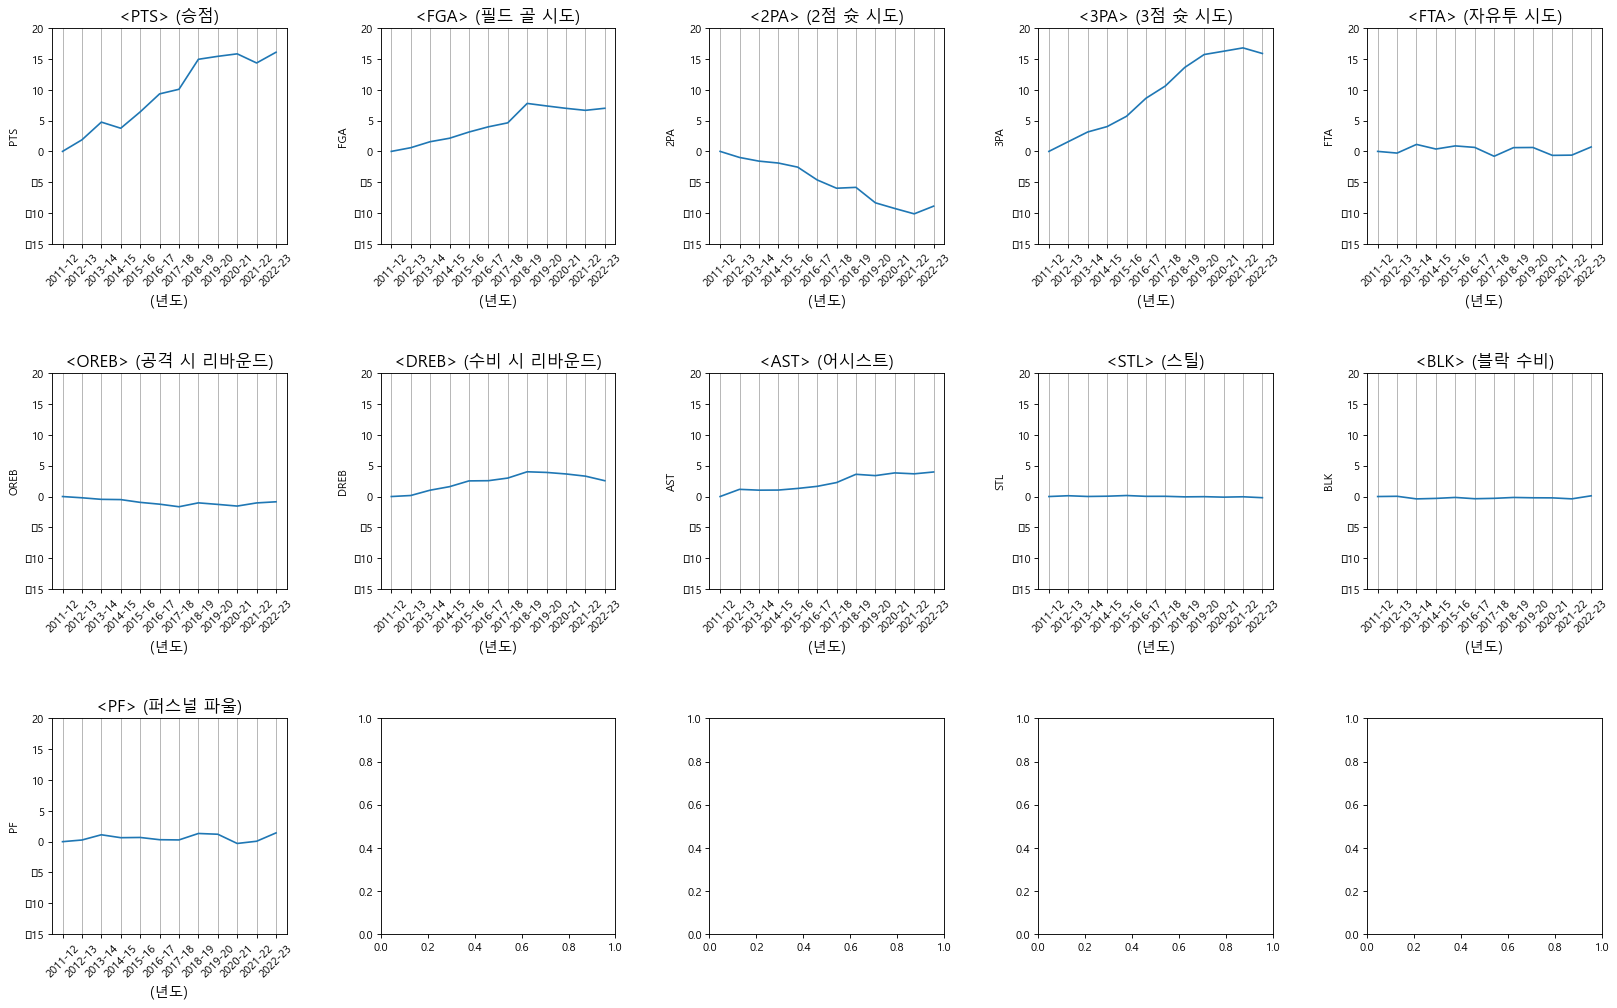

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# matplot 그래프 설정
plt.rcParams.update({'figure.dpi'     : '80',
                     'figure.figsize' : [9,6],
                     'font.size'      : '10',
                     'font.family'    : 'Malgun Gothic'})

###################그래프 그리기######################

# ▶subplot을 이용한 그래프 나열 설정
f, ax = plt.subplots(3,5)                         # 그래프의 개수(행,열) 설정
f.set_size_inches((25,15))                        # 그래프 사이즈 설정
plt.subplots_adjust(wspace = 0.4, hspace = 0.6)   # 그래프 간격 설정

def lineplot(xl,yl,tit, tit_inf):
    
    sns.lineplot(data = Mean_table1, x = 'SEASON', y = tit, ax = ax[xl,yl])
    ax[xl,yl].set_title(f'<{tit}> ({tit_inf})',fontsize = 15)             # 그래프 제목
    ax[xl,yl].set_xlabel('(년도)',fontsize = 13)              # x축 이름
    # ax[xl,yl].set_ylabel(f'({tit_inf})',fontsize=10,loc = 'center',rotation = 90)          # y축 이름
    ax[xl,yl].set_xticklabels(df_Trad['SEASON'].unique(),rotation = 45)
    ax[xl,yl].grid(True, axis = 'x')                          # 그래프 점선 (월별 비교의 편의를 위한 x축 점선만 설정)
    ax[xl,yl].set_ylim([-15,20])
    
lineplot(0,0,'PTS','승점')
lineplot(0,1,'FGA','필드 골 시도')

lineplot(0,2,'2PA','2점 슛 시도')
lineplot(0,3,'3PA','3점 슛 시도')
lineplot(0,4,'FTA','자유투 시도')

lineplot(1,0,'OREB','공격 시 리바운드')
lineplot(1,1,'DREB','수비 시 리바운드')

lineplot(1,2,'AST','어시스트')
lineplot(1,3,'STL','스틸')

lineplot(1,4,'BLK','블락 수비')
lineplot(2,0,'PF','퍼스널 파울')

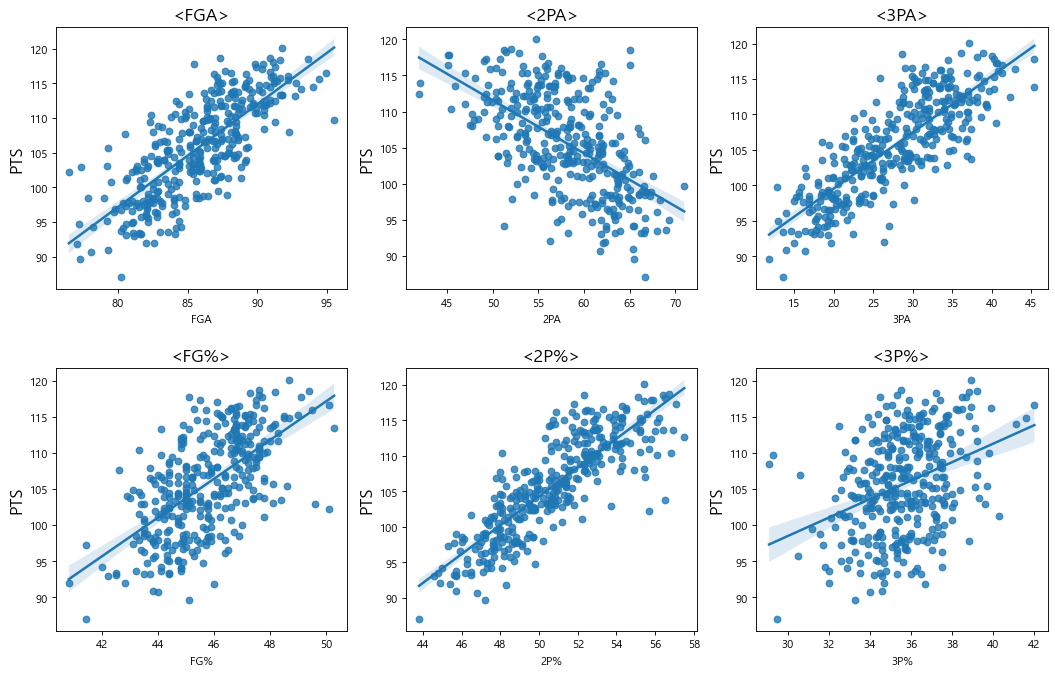

In [6]:
fig, axs = plt.subplots(figsize=(16,10), ncols = 3, nrows=2)
plt.subplots_adjust(hspace = 0.3)
lm_features = ['FGA','2PA','3PA','FG%','2P%','3P%']
for i, feature in enumerate(lm_features):
    row = int(i/3)
    col = i%3
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현(regplot 기능)
    # ax(축) 자리 지정
    sns.regplot(x=feature, y='PTS', data = df_Trad, ax = axs[row][col])
    axs[row][col].set_title(f'<{feature}>', fontsize = 16)
    axs[row][col].set_ylabel(f'PTS',fontsize= 15)
    axs[row][col].set_xlabel(f'{feature}')
    

In [7]:
labels = ['하','중','상']
df_Trad['group'] = pd.qcut(df_Trad['PTS'],3,labels = labels)
df_Trad['3P%_Overmean'] = np.where(df_Trad['3P%'] >= df_Trad['3P%'].mean(),'Y','N')
df_Trad['3PA_Overmean'] = np.where(df_Trad['3PA'] >= df_Trad['3PA'].mean(),'Y','N')
df_Trad

,Rank,Team,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,2PM,2PA,2P%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON,group,3P%_Overmean,3PA_Overmean
0,1,Chicago Bulls,66.0,50.0,16.0,0.758,48.3,96.3,37.4,82.8,45.2,31.1,65.9,47.2,6.3,16.9,37.5,15.2,21.1,72.2,13.9,32.8,46.7,23.1,14.0,6.9,5.9,5.2,17.3,17.7,8.2,2011-12,하,Y,N
1,1,San Antonio Spurs,66.0,50.0,16.0,0.758,48.3,103.7,39.6,82.8,47.8,31.2,61.5,50.7,8.4,21.3,39.3,16.2,21.6,74.8,10.3,32.6,43.0,23.2,13.6,7.4,4.4,5.0,17.3,18.8,7.2,2011-12,중,Y,N
2,3,Oklahoma City Thunder,66.0,47.0,19.0,0.712,48.5,103.1,37.3,79.2,47.1,30.1,59.2,50.8,7.2,20.0,35.8,21.3,26.4,80.6,11.0,32.7,43.7,18.5,16.3,7.5,8.2,4.9,20.5,20.0,6.1,2011-12,중,Y,N
3,4,Miami Heat,66.0,46.0,20.0,0.697,48.6,98.5,37.1,79.0,46.9,31.5,63.4,49.7,5.6,15.6,35.9,18.8,24.2,77.5,10.4,31.2,41.6,20.0,15.2,8.9,5.4,4.2,19.4,20.5,6.0,2011-12,하,Y,N
4,5,Indiana Pacers,66.0,42.0,24.0,0.636,48.5,97.7,35.7,81.4,43.8,29.8,65.3,45.6,5.9,16.1,36.8,20.4,26.1,78.2,12.5,31.4,43.9,18.6,14.0,7.9,5.4,6.0,21.7,21.6,3.3,2011-12,하,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26,Detroit Pistons,11.0,3.0,8.0,0.273,48.0,107.7,37.7,88.5,42.6,26.3,54.8,48.0,11.4,33.7,33.7,20.9,26.6,78.5,11.7,32.2,43.9,21.2,14.9,6.4,4.0,8.3,22.5,21.8,-9.7,2022-23,중,N,Y
26,27,Charlotte Hornets,12.0,3.0,9.0,0.250,48.8,107.9,40.3,92.3,43.7,29.5,59.7,49.4,10.8,32.6,33.0,16.5,23.0,71.7,12.8,32.8,45.6,26.1,14.7,7.7,6.0,7.4,20.6,20.5,-5.2,2022-23,중,N,Y
27,27,Orlando Magic,12.0,3.0,9.0,0.250,48.4,110.1,40.2,83.8,47.9,30.6,54.5,56.1,9.6,29.3,32.8,20.2,25.9,77.8,9.7,36.0,45.7,21.1,16.8,6.1,5.8,4.1,22.6,21.8,-3.6,2022-23,상,N,Y
28,29,Los Angeles Lakers,10.0,2.0,8.0,0.200,48.5,108.4,40.2,90.5,44.4,30.9,58.5,52.8,9.3,32.0,29.1,18.7,23.6,79.2,9.6,35.5,45.1,23.2,15.2,7.8,5.5,5.8,20.1,20.5,-7.9,2022-23,중,N,Y


<AxesSubplot:xlabel='group', ylabel='count'>

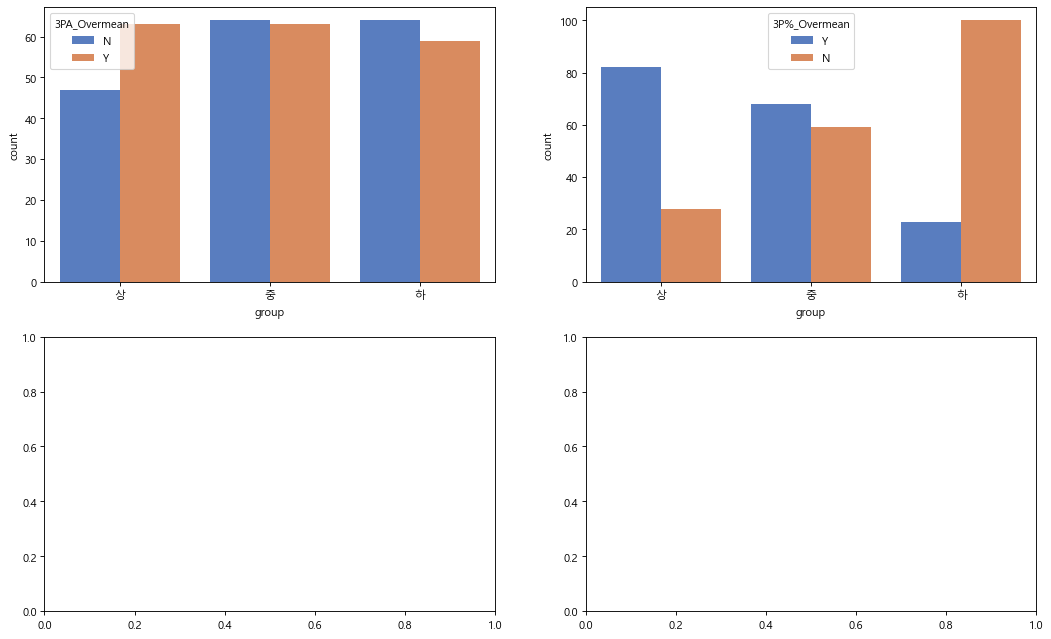

In [18]:
fig, axs = plt.subplots(figsize=(16,10), ncols = 2, nrows=2)
sns.countplot(data = df_Trad, x = 'group', hue = '3PA_Overmean',palette='muted', order = ['상','중','하'],ax = axs[0,0])
# axs[0,0].set_legend(loc = 'upper center', title = '3PA_Overmean')
sns.countplot(data = df_Trad, x = 'group', hue = '3P%_Overmean',palette='muted', order = ['상','중','하'],ax = axs[0,1])
# axs[0,1].set_legend(loc = 'upper center', title = '3P%_Overmean')

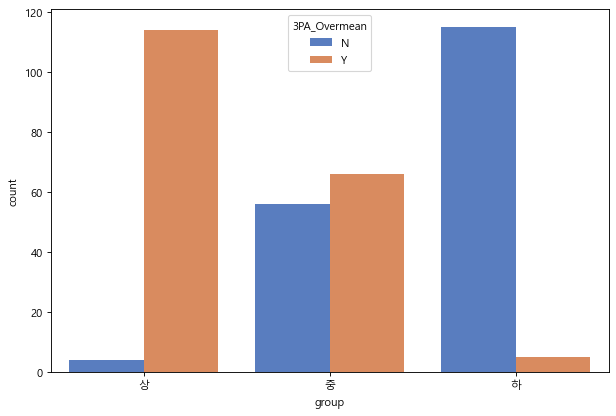

In [11]:
import seaborn as sns
sns.countplot(data = df_Trad, x = 'group', hue = '3PA_Overmean',palette='muted', order = ['상','중','하'])
plt.legend(loc = 'upper center', title = '3PA_Overmean')

In [12]:
labels = ['하','중','상']
df_Trad['group'] = pd.qcut(df_Trad['WIN%'],3,labels = labels)
df_Trad['3P%_Overmean'] = np.where(df_Trad['3P%'] >= df_Trad['3P%'].mean(),'Y','N')
df_Trad['3PA_Overmean'] = np.where(df_Trad['3PA'] >= df_Trad['3PA'].mean(),'Y','N')
df_Trad

,Rank,Team,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,2PM,2PA,2P%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON,group,3P%_Overmean,3PA_Overmean
0,1,Chicago Bulls,66.0,50.0,16.0,0.758,48.3,96.3,37.4,82.8,45.2,31.1,65.9,47.2,6.3,16.9,37.5,15.2,21.1,72.2,13.9,32.8,46.7,23.1,14.0,6.9,5.9,5.2,17.3,17.7,8.2,2011-12,상,Y,N
1,1,San Antonio Spurs,66.0,50.0,16.0,0.758,48.3,103.7,39.6,82.8,47.8,31.2,61.5,50.7,8.4,21.3,39.3,16.2,21.6,74.8,10.3,32.6,43.0,23.2,13.6,7.4,4.4,5.0,17.3,18.8,7.2,2011-12,상,Y,N
2,3,Oklahoma City Thunder,66.0,47.0,19.0,0.712,48.5,103.1,37.3,79.2,47.1,30.1,59.2,50.8,7.2,20.0,35.8,21.3,26.4,80.6,11.0,32.7,43.7,18.5,16.3,7.5,8.2,4.9,20.5,20.0,6.1,2011-12,상,Y,N
3,4,Miami Heat,66.0,46.0,20.0,0.697,48.6,98.5,37.1,79.0,46.9,31.5,63.4,49.7,5.6,15.6,35.9,18.8,24.2,77.5,10.4,31.2,41.6,20.0,15.2,8.9,5.4,4.2,19.4,20.5,6.0,2011-12,상,Y,N
4,5,Indiana Pacers,66.0,42.0,24.0,0.636,48.5,97.7,35.7,81.4,43.8,29.8,65.3,45.6,5.9,16.1,36.8,20.4,26.1,78.2,12.5,31.4,43.9,18.6,14.0,7.9,5.4,6.0,21.7,21.6,3.3,2011-12,상,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26,Detroit Pistons,11.0,3.0,8.0,0.273,48.0,107.7,37.7,88.5,42.6,26.3,54.8,48.0,11.4,33.7,33.7,20.9,26.6,78.5,11.7,32.2,43.9,21.2,14.9,6.4,4.0,8.3,22.5,21.8,-9.7,2022-23,하,N,Y
26,27,Charlotte Hornets,12.0,3.0,9.0,0.250,48.8,107.9,40.3,92.3,43.7,29.5,59.7,49.4,10.8,32.6,33.0,16.5,23.0,71.7,12.8,32.8,45.6,26.1,14.7,7.7,6.0,7.4,20.6,20.5,-5.2,2022-23,하,N,Y
27,27,Orlando Magic,12.0,3.0,9.0,0.250,48.4,110.1,40.2,83.8,47.9,30.6,54.5,56.1,9.6,29.3,32.8,20.2,25.9,77.8,9.7,36.0,45.7,21.1,16.8,6.1,5.8,4.1,22.6,21.8,-3.6,2022-23,하,N,Y
28,29,Los Angeles Lakers,10.0,2.0,8.0,0.200,48.5,108.4,40.2,90.5,44.4,30.9,58.5,52.8,9.3,32.0,29.1,18.7,23.6,79.2,9.6,35.5,45.1,23.2,15.2,7.8,5.5,5.8,20.1,20.5,-7.9,2022-23,하,N,Y


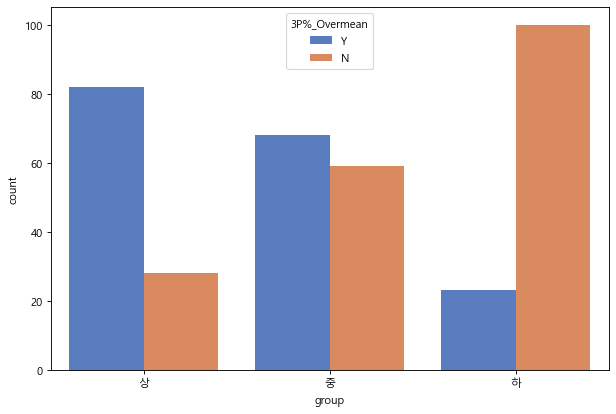

In [14]:
import seaborn as sns
sns.countplot(data = df_Trad, x = 'group', hue = '3P%_Overmean',palette='muted', order = ['상','중','하'])
plt.legend(loc = 'upper center', title = '3P%_Overmean')

## Four-factors 스탯

### 데이터 처리 과정

In [113]:
four_factors_table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz').text.split('\n')
four_factors_table

['TEAM GP W L WIN% MIN EFG% FTA',
 'RATE TOV% OREB% OPP',
 'EFG% OPP',
 'FTA RATE OPP',
 'TOV% OPP',
 'OREB%',
 '',
 '',
 '',
 '',
 '',
 '1 Chicago Bulls 66 50 16 .758 3188 49.0 0.255 15.4 36.1 45.0 0.236 14.7 29.7',
 '1 San Antonio Spurs 66 50 16 .758 3188 52.8 0.261 14.4 28.2 48.9 0.222 14.6 28.0',
 '3 Oklahoma City Thunder 66 47 19 .712 3198 51.6 0.334 17.2 30.4 46.5 0.270 15.0 31.3',
 '4 Miami Heat 66 46 20 .697 3208 50.5 0.307 16.3 29.9 47.9 0.277 18.0 30.7',
 '5 Indiana Pacers 66 42 24 .636 3198 47.4 0.321 15.1 33.3 47.6 0.305 16.1 31.1',
 '6 Los Angeles Lakers 66 41 25 .621 3213 49.1 0.299 16.2 32.7 47.6 0.213 12.1 28.1',
 '6 Memphis Grizzlies 66 41 25 .621 3188 47.3 0.277 15.7 33.5 48.5 0.297 18.5 31.2',
 '8 Atlanta Hawks 66 40 26 .606 3233 50.0 0.259 15.1 27.9 48.0 0.247 16.3 29.7',
 '8 Los Angeles Clippers 66 40 26 .606 3193 50.2 0.287 14.7 33.1 49.2 0.329 16.1 30.8',
 '10 Boston Celtics 66 39 27 .591 3188 49.6 0.257 16.2 24.5 45.2 0.285 17.1 31.4',
 '11 Denver Nuggets 66 38 

In [30]:
driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz').text.split('\n')[0].split(' ')

['TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'EFG%', 'FTA']

In [31]:
driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz').text.split('\n')[1][5:-4].split(' ')

['TOV%', 'OREB%']

In [45]:
driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz').text.split('\n')[2].replace(' ','')

'EFG%OPP'

In [46]:
driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz').text.split('\n')[3].replace(' ','')

'FTARATEOPP'

In [47]:
driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz').text.split('\n')[4].replace(' ','')

'TOV%OPP'

In [48]:
driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz').text.split('\n')[5]

'OREB%'

In [297]:
four_factors_table_columns = \
four_factors_table[0] +' ' + \
four_factors_table[1][5:-4] + ' ' +\
four_factors_table[2].replace(' ','') +' ' + \
four_factors_table[3].replace(' ','') + ' ' +\
four_factors_table[4].replace(' ','') +' ' + \
four_factors_table[5] + 'OPP'

print(four_factors_table_columns)
four_factors_columns = four_factors_table_columns.split(' ')
print(four_factors_columns,end = ' ')

TEAM GP W L WIN% MIN EFG% FTA TOV% OREB% EFG%OPP FTARATEOPP TOV%OPP OREB%OPP
['TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'EFG%', 'FTA', 'TOV%', 'OREB%', 'EFG%OPP', 'FTARATEOPP', 'TOV%OPP', 'OREB%OPP'] 

In [298]:
table_values = four_factors_table[11:]
table_values

['1 Chicago Bulls 66 50 16 .758 3188 49.0 0.255 15.4 36.1 45.0 0.236 14.7 29.7',
 '1 San Antonio Spurs 66 50 16 .758 3188 52.8 0.261 14.4 28.2 48.9 0.222 14.6 28.0',
 '3 Oklahoma City Thunder 66 47 19 .712 3198 51.6 0.334 17.2 30.4 46.5 0.270 15.0 31.3',
 '4 Miami Heat 66 46 20 .697 3208 50.5 0.307 16.3 29.9 47.9 0.277 18.0 30.7',
 '5 Indiana Pacers 66 42 24 .636 3198 47.4 0.321 15.1 33.3 47.6 0.305 16.1 31.1',
 '6 Los Angeles Lakers 66 41 25 .621 3213 49.1 0.299 16.2 32.7 47.6 0.213 12.1 28.1',
 '6 Memphis Grizzlies 66 41 25 .621 3188 47.3 0.277 15.7 33.5 48.5 0.297 18.5 31.2',
 '8 Atlanta Hawks 66 40 26 .606 3233 50.0 0.259 15.1 27.9 48.0 0.247 16.3 29.7',
 '8 Los Angeles Clippers 66 40 26 .606 3193 50.2 0.287 14.7 33.1 49.2 0.329 16.1 30.8',
 '10 Boston Celtics 66 39 27 .591 3188 49.6 0.257 16.2 24.5 45.2 0.285 17.1 31.4',
 '11 Denver Nuggets 66 38 28 .576 3208 51.6 0.326 16.0 31.6 50.8 0.243 16.2 29.5',
 '12 Orlando Magic 66 37 29 .561 3193 50.6 0.292 16.5 30.6 48.8 0.246 14.5 28.0

In [279]:
four_factors_rank = []

for i in range(len(table_values)):
    rank = table_values[i].replace(s.search(table_values[i]).group(),'').split()[0]
    four_factors_rank.append(rank)
four_factors_rank


['1',
 '1',
 '3',
 '4',
 '5',
 '6',
 '6',
 '8',
 '8',
 '10',
 '11',
 '12',
 '13',
 '13',
 '13',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '23',
 '25',
 '25',
 '27',
 '27',
 '29',
 '30']

In [ ]:
# 이렇게 만들면 팀이름에 숫자가 포함되어 있는 이름은 짤림..

import re

p = re.compile('\D+')
four_factors_team_names = []
for i in range(len(table_values)):
    team_name = p.search(table_values[i]).group().strip()
    four_factors_team_names.append(team_name)
    
four_factors_team_names

['Chicago Bulls',
 'San Antonio Spurs',
 'Oklahoma City Thunder',
 'Miami Heat',
 'Indiana Pacers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Atlanta Hawks',
 'Los Angeles Clippers',
 'Boston Celtics',
 'Denver Nuggets',
 'Orlando Magic',
 'Dallas Mavericks',
 'New York Knicks',
 'Utah Jazz',
 'Philadelphia',
 'Houston Rockets',
 'Phoenix Suns',
 'Milwaukee Bucks',
 'Portland Trail Blazers',
 'Minnesota Timberwolves',
 'Detroit Pistons',
 'Golden State Warriors',
 'Toronto Raptors',
 'New Jersey Nets',
 'Sacramento Kings',
 'Cleveland Cavaliers',
 'New Orleans Hornets',
 'Washington Wizards',
 'Charlotte Bobcats']

In [286]:
s = re.compile('[a-zA-Z].+[a-zA-Z]')
four_factors_team_names = []
for i in range(len(table_values)):
    names = s.search(table_values[i]).group()
    four_factors_team_names.append(names)
    
four_factors_team_names

['Chicago Bulls',
 'San Antonio Spurs',
 'Oklahoma City Thunder',
 'Miami Heat',
 'Indiana Pacers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Atlanta Hawks',
 'Los Angeles Clippers',
 'Boston Celtics',
 'Denver Nuggets',
 'Orlando Magic',
 'Dallas Mavericks',
 'New York Knicks',
 'Utah Jazz',
 'Philadelphia 76ers',
 'Houston Rockets',
 'Phoenix Suns',
 'Milwaukee Bucks',
 'Portland Trail Blazers',
 'Minnesota Timberwolves',
 'Detroit Pistons',
 'Golden State Warriors',
 'Toronto Raptors',
 'New Jersey Nets',
 'Sacramento Kings',
 'Cleveland Cavaliers',
 'New Orleans Hornets',
 'Washington Wizards',
 'Charlotte Bobcats']

In [287]:
four_factors_values = []
for i in range(len(table_values)):
    values = table_values[i].replace(s.search(table_values[i]).group(),'').split()[1:]
    four_factors_values.append(values)
    
four_factors_values

[['66',
  '50',
  '16',
  '.758',
  '3188',
  '49.0',
  '0.255',
  '15.4',
  '36.1',
  '45.0',
  '0.236',
  '14.7',
  '29.7'],
 ['66',
  '50',
  '16',
  '.758',
  '3188',
  '52.8',
  '0.261',
  '14.4',
  '28.2',
  '48.9',
  '0.222',
  '14.6',
  '28.0'],
 ['66',
  '47',
  '19',
  '.712',
  '3198',
  '51.6',
  '0.334',
  '17.2',
  '30.4',
  '46.5',
  '0.270',
  '15.0',
  '31.3'],
 ['66',
  '46',
  '20',
  '.697',
  '3208',
  '50.5',
  '0.307',
  '16.3',
  '29.9',
  '47.9',
  '0.277',
  '18.0',
  '30.7'],
 ['66',
  '42',
  '24',
  '.636',
  '3198',
  '47.4',
  '0.321',
  '15.1',
  '33.3',
  '47.6',
  '0.305',
  '16.1',
  '31.1'],
 ['66',
  '41',
  '25',
  '.621',
  '3213',
  '49.1',
  '0.299',
  '16.2',
  '32.7',
  '47.6',
  '0.213',
  '12.1',
  '28.1'],
 ['66',
  '41',
  '25',
  '.621',
  '3188',
  '47.3',
  '0.277',
  '15.7',
  '33.5',
  '48.5',
  '0.297',
  '18.5',
  '31.2'],
 ['66',
  '40',
  '26',
  '.606',
  '3233',
  '50.0',
  '0.259',
  '15.1',
  '27.9',
  '48.0',
  '0.247',
  '16

In [293]:
table = pd.DataFrame(index = four_factors_rank, columns = four_factors_columns[1:], data = four_factors_values)
table

,GP,W,L,WIN%,MIN,EFG%,FTA,TOV%,OREB%,EFG%OPP,FTARATEOPP,TOV%OPP,OREB%OPP
1,66,50,16,.758,3188,49.0,0.255,15.4,36.1,45.0,0.236,14.7,29.7
1,66,50,16,.758,3188,52.8,0.261,14.4,28.2,48.9,0.222,14.6,28.0
3,66,47,19,.712,3198,51.6,0.334,17.2,30.4,46.5,0.270,15.0,31.3
4,66,46,20,.697,3208,50.5,0.307,16.3,29.9,47.9,0.277,18.0,30.7
5,66,42,24,.636,3198,47.4,0.321,15.1,33.3,47.6,0.305,16.1,31.1
6,66,41,25,.621,3213,49.1,0.299,16.2,32.7,47.6,0.213,12.1,28.1
6,66,41,25,.621,3188,47.3,0.277,15.7,33.5,48.5,0.297,18.5,31.2
8,66,40,26,.606,3233,50.0,0.259,15.1,27.9,48.0,0.247,16.3,29.7
8,66,40,26,.606,3193,50.2,0.287,14.7,33.1,49.2,0.329,16.1,30.8
10,66,39,27,.591,3188,49.6,0.257,16.2,24.5,45.2,0.285,17.1,31.4


In [294]:
table.insert(0,'Rank',four_factors_rank)
table.insert(1,'Team',four_factors_team_names)
table

,Rank,Team,GP,W,L,WIN%,MIN,EFG%,FTA,TOV%,OREB%,EFG%OPP,FTARATEOPP,TOV%OPP,OREB%OPP
1,1,Chicago Bulls,66,50,16,.758,3188,49.0,0.255,15.4,36.1,45.0,0.236,14.7,29.7
1,1,San Antonio Spurs,66,50,16,.758,3188,52.8,0.261,14.4,28.2,48.9,0.222,14.6,28.0
3,3,Oklahoma City Thunder,66,47,19,.712,3198,51.6,0.334,17.2,30.4,46.5,0.270,15.0,31.3
4,4,Miami Heat,66,46,20,.697,3208,50.5,0.307,16.3,29.9,47.9,0.277,18.0,30.7
5,5,Indiana Pacers,66,42,24,.636,3198,47.4,0.321,15.1,33.3,47.6,0.305,16.1,31.1
6,6,Los Angeles Lakers,66,41,25,.621,3213,49.1,0.299,16.2,32.7,47.6,0.213,12.1,28.1
6,6,Memphis Grizzlies,66,41,25,.621,3188,47.3,0.277,15.7,33.5,48.5,0.297,18.5,31.2
8,8,Atlanta Hawks,66,40,26,.606,3233,50.0,0.259,15.1,27.9,48.0,0.247,16.3,29.7
8,8,Los Angeles Clippers,66,40,26,.606,3193,50.2,0.287,14.7,33.1,49.2,0.329,16.1,30.8
10,10,Boston Celtics,66,39,27,.591,3188,49.6,0.257,16.2,24.5,45.2,0.285,17.1,31.4


In [295]:
table

,Rank,Team,GP,W,L,WIN%,MIN,EFG%,FTA,TOV%,OREB%,EFG%OPP,FTARATEOPP,TOV%OPP,OREB%OPP
1,1,Chicago Bulls,66,50,16,.758,3188,49.0,0.255,15.4,36.1,45.0,0.236,14.7,29.7
1,1,San Antonio Spurs,66,50,16,.758,3188,52.8,0.261,14.4,28.2,48.9,0.222,14.6,28.0
3,3,Oklahoma City Thunder,66,47,19,.712,3198,51.6,0.334,17.2,30.4,46.5,0.270,15.0,31.3
4,4,Miami Heat,66,46,20,.697,3208,50.5,0.307,16.3,29.9,47.9,0.277,18.0,30.7
5,5,Indiana Pacers,66,42,24,.636,3198,47.4,0.321,15.1,33.3,47.6,0.305,16.1,31.1
6,6,Los Angeles Lakers,66,41,25,.621,3213,49.1,0.299,16.2,32.7,47.6,0.213,12.1,28.1
6,6,Memphis Grizzlies,66,41,25,.621,3188,47.3,0.277,15.7,33.5,48.5,0.297,18.5,31.2
8,8,Atlanta Hawks,66,40,26,.606,3233,50.0,0.259,15.1,27.9,48.0,0.247,16.3,29.7
8,8,Los Angeles Clippers,66,40,26,.606,3193,50.2,0.287,14.7,33.1,49.2,0.329,16.1,30.8
10,10,Boston Celtics,66,39,27,.591,3188,49.6,0.257,16.2,24.5,45.2,0.285,17.1,31.4


In [21]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import numpy as np
import pandas as pd
from datetime import datetime
import time
import math
import datetime
import re


driver = webdriver.Chrome('chromedriver.exe')
url1 = 'https://www.nba.com/stats/teams/'
url2 = '?Season='
NBA_team_df = pd.DataFrame()
table_concept = 'four-factors'
year_start = 15
year_finish= 22

start = time.time()
for i in range(year_start,year_finish):
    url3 = f'20{i}-{i+1}'
    url = url1 + table_concept + url2 + url3

    driver.get(url)

    time.sleep(3)
    
    # 테이블 전체
    four_factors_table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz').text.split('\n')
    
    # 테이블 칼럼
    four_factors_table_columns = \
    four_factors_table[0] +' ' + \
    four_factors_table[1][5:-4] + ' ' +\
    four_factors_table[2].replace(' ','') +' ' + \
    four_factors_table[3].replace(' ','') + ' ' +\
    four_factors_table[4].replace(' ','') +' ' + \
    four_factors_table[5] + 'OPP'
    four_factors_columns = four_factors_table_columns.split(' ')

    # 테이블 전체 값
    table_values = four_factors_table[11:]
    
    # 값 나누기
    s = re.compile('[a-zA-Z].+[a-zA-Z]')
    
    four_factors_rank = []
    four_factors_team_names = []
    four_factors_values = []
    
    
    for j in range(len(table_values)):
        rank = table_values[j].replace(s.search(table_values[j]).group(),'').split()[0]
        names = s.search(table_values[j]).group()
        values = table_values[j].replace(s.search(table_values[j]).group(),'').split()[1:]
        
        four_factors_rank.append(rank)
        four_factors_team_names.append(names)
        four_factors_values.append(values)
        
        
    table = pd.DataFrame(index = four_factors_rank, columns = four_factors_columns[1:], data = four_factors_values)
    table.insert(0,'Rank',four_factors_rank)
    table.insert(1,'Team',four_factors_team_names)
    table['SEASON'] = url3
    
    
    NBA_team_df = pd.concat([NBA_team_df,table])
    print(url3)
end = time.time()

NBA_team_df.iloc[:,2:-1] = NBA_team_df.iloc[:,2:-1].astype('float')

sec = (end - start)
result = datetime.timedelta(seconds=sec)
print(result)

result_list = str(datetime.timedelta(seconds=sec)).split(".")
print(result_list[0])


NBA_team_df

C:\Users\82103\AppData\Local\Temp\ipykernel_2132\1750613182.py:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


2015-16
2016-17
2017-18
2018-19
2019-20
2020-21
2021-22
0:00:34.282550
0:00:34


,Rank,Team,GP,W,L,WIN%,MIN,EFG%,FTA,TOV%,OREB%,EFG%OPP,FTARATEOPP,TOV%OPP,OREB%OPP,SEASON
1,1,Golden State Warriors,82.0,73.0,9.0,0.890,3976.0,56.3,0.250,15.0,26.7,47.9,0.275,14.3,28.0,2015-16
2,2,San Antonio Spurs,82.0,67.0,15.0,0.817,3941.0,52.6,0.246,13.8,26.6,47.7,0.240,15.7,25.4,2015-16
3,3,Cleveland Cavaliers,82.0,57.0,25.0,0.695,3971.0,52.4,0.259,14.3,29.4,49.6,0.275,14.1,25.8,2015-16
4,4,Toronto Raptors,82.0,56.0,26.0,0.683,3956.0,50.4,0.328,13.9,30.0,49.8,0.269,14.2,26.4,2015-16
5,5,Oklahoma City Thunder,82.0,55.0,27.0,0.671,3966.0,52.4,0.292,16.2,34.7,48.4,0.271,13.3,28.0,2015-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,26,Indiana Pacers,82.0,25.0,57.0,0.305,3976.0,53.1,0.239,14.5,31.0,55.2,0.256,13.3,27.5,2021-22
27,27,Oklahoma City Thunder,82.0,24.0,58.0,0.293,3961.0,49.7,0.223,14.0,25.6,53.3,0.220,13.2,27.3,2021-22
28,28,Detroit Pistons,82.0,23.0,59.0,0.280,3956.0,49.4,0.249,14.3,27.6,54.1,0.292,14.7,29.3,2021-22
29,29,Orlando Magic,82.0,22.0,60.0,0.268,3956.0,50.3,0.223,14.4,24.9,53.2,0.254,13.1,26.5,2021-22


In [22]:
df = NBA_team_df.copy()

In [23]:
df['Rank'] = df['Rank'].astype('int')
df['label'] = np.where(df['Rank'] <= 8,1,0)
df

,Rank,Team,GP,W,L,WIN%,MIN,EFG%,FTA,TOV%,OREB%,EFG%OPP,FTARATEOPP,TOV%OPP,OREB%OPP,SEASON,label
1,1,Golden State Warriors,82.0,73.0,9.0,0.890,3976.0,56.3,0.250,15.0,26.7,47.9,0.275,14.3,28.0,2015-16,1
2,2,San Antonio Spurs,82.0,67.0,15.0,0.817,3941.0,52.6,0.246,13.8,26.6,47.7,0.240,15.7,25.4,2015-16,1
3,3,Cleveland Cavaliers,82.0,57.0,25.0,0.695,3971.0,52.4,0.259,14.3,29.4,49.6,0.275,14.1,25.8,2015-16,1
4,4,Toronto Raptors,82.0,56.0,26.0,0.683,3956.0,50.4,0.328,13.9,30.0,49.8,0.269,14.2,26.4,2015-16,1
5,5,Oklahoma City Thunder,82.0,55.0,27.0,0.671,3966.0,52.4,0.292,16.2,34.7,48.4,0.271,13.3,28.0,2015-16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,26,Indiana Pacers,82.0,25.0,57.0,0.305,3976.0,53.1,0.239,14.5,31.0,55.2,0.256,13.3,27.5,2021-22,0
27,27,Oklahoma City Thunder,82.0,24.0,58.0,0.293,3961.0,49.7,0.223,14.0,25.6,53.3,0.220,13.2,27.3,2021-22,0
28,28,Detroit Pistons,82.0,23.0,59.0,0.280,3956.0,49.4,0.249,14.3,27.6,54.1,0.292,14.7,29.3,2021-22,0
29,29,Orlando Magic,82.0,22.0,60.0,0.268,3956.0,50.3,0.223,14.4,24.9,53.2,0.254,13.1,26.5,2021-22,0


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy  = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall    = recall_score(y_test, pred)
    f1        = f1_score(y_test, pred)
    # roc_auc   = roc_auc_score(y_test,pred_proba)
        
    print(confusion)
    print(f'정확도 : {accuracy:.4f} \n정밀도 : {precision:.4f} \n재현율 : {recall:.4f} \nF1_스코어 : {f1:.4f} \nAUC : ')
# get_clf_eval(y_test,pred,pred_proba)

In [25]:
from sklearn.model_selection import train_test_split

X = features = df.iloc[:,2:-2]
y = labels   = df.iloc[:,-1]

X_train,X_test, y_train,y_test = train_test_split(X.drop(['GP','W','L','WIN%'],axis=1), y, test_size=0.3,random_state=1)

# 모델 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('DecisionTree 정확도 : ' ,accuracy_score(y_test,pred).round(4))
get_clf_eval(y_test, pred)
print('〓'*30)

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print('RandomForest 정확도 : ' ,accuracy_score(y_test,pred).round(4))
get_clf_eval(y_test, pred)
print('〓'*30)

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
print('Logistic Regression 정확도 : ' ,accuracy_score(y_test,pred).round(4))
get_clf_eval(y_test, pred, pred_proba)

print('〓'*40)
print('피처 중요도 : \n', dt_clf.feature_importances_)
print('〓'*40)
print('피처 이름 : \n', dt_clf.feature_names_in_)
print('〓'*40)
print(pd.Series(data = dt_clf.feature_importances_, index = dt_clf.feature_names_in_))
print('〓'*40)
print(pd.Series(data = dt_clf.feature_importances_, index = dt_clf.feature_names_in_).sort_values(ascending = False))

DecisionTree 정확도 :  0.746
[[32 10]
 [ 6 15]]
정확도 : 0.7460 
정밀도 : 0.6000 
재현율 : 0.7143 
F1_스코어 : 0.6522 
AUC : 
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
RandomForest 정확도 :  0.8254
[[39  3]
 [ 8 13]]
정확도 : 0.8254 
정밀도 : 0.8125 
재현율 : 0.6190 
F1_스코어 : 0.7027 
AUC : 
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
Logistic Regression 정확도 :  0.9048
[[40  2]
 [ 4 17]]
정확도 : 0.9048 
정밀도 : 0.8947 
재현율 : 0.8095 
F1_스코어 : 0.8500 
AUC : 
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
피처 중요도 : 
 [0.0691898  0.31997171 0.10255022 0.06390369 0.02252501 0.32938335
 0.09247623 0.         0.        ]
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
피처 이름 : 
 ['MIN' 'EFG%' 'FTA' 'TOV%' 'OREB%' 'EFG%OPP' 'FTARATEOPP' 'TOV%OPP'
 'OREB%OPP']
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
MIN           0.069190
EFG%          0.319972
FTA           0.102550
TOV%          0.063904
OREB%         0.022525
EFG%OPP       0.329383
FTARATEOPP    0.092476
TOV%OPP       0.000000
OREB%OPP      0.000000
dtype: float64
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
EFG%OP

C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
df[df['Team'] == 'Golden State Warriors']

,Rank,Team,GP,W,L,WIN%,MIN,EFG%,FTA,TOV%,OREB%,EFG%OPP,FTARATEOPP,TOV%OPP,OREB%OPP,SEASON,label
1,1,Golden State Warriors,82.0,73.0,9.0,0.890,3976.0,56.3,0.250,15.0,26.7,47.9,0.275,14.3,28.0,2015-16,1
1,1,Golden State Warriors,82.0,67.0,15.0,0.817,3956.0,56.3,0.259,14.6,27.2,48.6,0.261,15.4,29.1,2016-17,1
3,3,Golden State Warriors,82.0,58.0,24.0,0.707,3946.0,56.9,0.239,15.3,24.3,50.4,0.245,14.2,28.8,2017-18,1
3,3,Golden State Warriors,82.0,57.0,25.0,0.695,3961.0,56.5,0.227,13.9,25.7,50.8,0.266,13.2,27.3,2018-19,1
30,30,Golden State Warriors,65.0,15.0,50.0,0.231,3145.0,49.7,0.264,14.6,25.5,55.3,0.247,15.4,27.8,2019-20,0
14,14,Golden State Warriors,72.0,39.0,33.0,0.542,3461.0,55.1,0.239,14.6,22.2,52.2,0.286,14.6,27.3,2020-21,0
3,3,Golden State Warriors,82.0,53.0,29.0,0.646,3946.0,55.2,0.235,15.0,26.9,50.9,0.265,14.7,26.4,2021-22,1


In [51]:
play_off_url = 'https://www.nba.com/stats/teams/four-factors?Season=2021-22&SeasonType=Playoffs'

driver.get(play_off_url)
q  = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz').text.split('\n')[11:]


play_off_teams = []
for i in range(len(q)):
    print(s.search(q[i]).group())
    team = s.search(q[i]).group()
    play_off_teams.append(team)
    
play_off_teams

Golden State Warriors
Miami Heat
Boston Celtics
Milwaukee Bucks
Phoenix Suns
Dallas Mavericks
Memphis Grizzlies
Philadelphia 76ers
Minnesota Timberwolves
New Orleans Pelicans
Toronto Raptors
Utah Jazz
Atlanta Hawks
Chicago Bulls
Denver Nuggets
Brooklyn Nets


['Golden State Warriors',
 'Miami Heat',
 'Boston Celtics',
 'Milwaukee Bucks',
 'Phoenix Suns',
 'Dallas Mavericks',
 'Memphis Grizzlies',
 'Philadelphia 76ers',
 'Minnesota Timberwolves',
 'New Orleans Pelicans',
 'Toronto Raptors',
 'Utah Jazz',
 'Atlanta Hawks',
 'Chicago Bulls',
 'Denver Nuggets',
 'Brooklyn Nets']

In [53]:
df[df['Team'].isin(play_off_teams)]

,Rank,Team,GP,W,L,WIN%,MIN,EFG%,FTA,TOV%,OREB%,EFG%OPP,FTARATEOPP,TOV%OPP,OREB%OPP,SEASON,label
1,1,Golden State Warriors,82.0,73.0,9.0,0.890,3976.0,56.3,0.250,15.0,26.7,47.9,0.275,14.3,28.0,2015-16,1
4,4,Toronto Raptors,82.0,56.0,26.0,0.683,3956.0,50.4,0.328,13.9,30.0,49.8,0.269,14.2,26.4,2015-16,1
7,7,Atlanta Hawks,82.0,48.0,34.0,0.585,3966.0,51.6,0.237,15.2,23.4,48.0,0.256,16.4,30.2,2015-16,1
7,7,Boston Celtics,82.0,48.0,34.0,0.585,3956.0,48.8,0.264,13.8,29.0,48.7,0.306,16.4,29.3,2015-16,1
7,7,Miami Heat,82.0,48.0,34.0,0.585,3966.0,50.8,0.282,14.8,28.0,48.5,0.255,13.6,27.1,2015-16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,12,Chicago Bulls,82.0,46.0,36.0,0.561,3946.0,54.1,0.248,13.0,24.9,54.1,0.251,13.2,26.5,2021-22,0
12,12,Minnesota Timberwolves,82.0,46.0,36.0,0.561,3956.0,53.9,0.254,14.1,28.4,53.5,0.291,16.0,29.4,2021-22,0
14,14,Brooklyn Nets,82.0,44.0,38.0,0.537,3951.0,54.0,0.246,14.1,28.1,52.1,0.255,13.3,29.6,2021-22,0
16,16,Atlanta Hawks,82.0,43.0,39.0,0.524,3941.0,54.3,0.253,12.0,26.9,54.3,0.224,12.9,26.9,2021-22,0


In [73]:
df.loc[df['Team'].isin(play_off_teams) , 'label'] = 1
df1 = df[df.Team.isin(play_off_teams)]

df1[df1['SEASON'] == '2021-22']

,Rank,Team,GP,W,L,WIN%,MIN,EFG%,FTA,TOV%,OREB%,EFG%OPP,FTARATEOPP,TOV%OPP,OREB%OPP,SEASON,label
1,1,Phoenix Suns,82.0,64.0,18.0,0.780,3946.0,54.9,0.221,12.9,26.4,51.0,0.257,14.6,27.2,2021-22,1
2,2,Memphis Grizzlies,82.0,56.0,26.0,0.683,3956.0,52.2,0.245,13.0,33.8,52.3,0.253,14.9,27.4,2021-22,1
3,3,Golden State Warriors,82.0,53.0,29.0,0.646,3946.0,55.2,0.235,15.0,26.9,50.9,0.265,14.7,26.4,2021-22,1
3,3,Miami Heat,82.0,53.0,29.0,0.646,3971.0,54.7,0.252,14.9,27.8,52.4,0.268,15.4,26.5,2021-22,1
5,5,Dallas Mavericks,82.0,52.0,30.0,0.634,3951.0,53.8,0.249,13.0,25.6,52.1,0.241,13.6,26.7,2021-22,1
6,6,Boston Celtics,82.0,51.0,31.0,0.622,3981.0,54.2,0.239,13.9,27.7,50.2,0.234,14.0,27.5,2021-22,1
6,6,Milwaukee Bucks,82.0,51.0,31.0,0.622,3951.0,54.6,0.257,13.3,26.9,53.6,0.220,12.9,25.3,2021-22,1
6,6,Philadelphia 76ers,82.0,51.0,31.0,0.622,3961.0,53.4,0.282,12.9,24.6,52.4,0.250,13.6,27.6,2021-22,1
9,9,Utah Jazz,82.0,49.0,33.0,0.598,3946.0,55.5,0.271,14.3,30.0,52.1,0.216,12.3,26.2,2021-22,1
10,10,Denver Nuggets,82.0,48.0,34.0,0.585,3961.0,55.6,0.244,14.6,26.8,53.7,0.249,12.9,24.8,2021-22,1


### 정리

In [21]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import numpy as np
import pandas as pd
from datetime import datetime
import time
import math
import datetime
import re


driver = webdriver.Chrome('chromedriver.exe')
url1 = 'https://www.nba.com/stats/teams/'
url2 = '?Season='
NBA_FrFactors_df = pd.DataFrame()
table_concept = 'four-factors'
year_start = 11
year_finish= 23

start = time.time()
for i in range(year_start,year_finish):
    url3 = f'20{i}-{i+1}'
    url = url1 + table_concept + url2 + url3

    driver.get(url)

    time.sleep(3)
    
    # 테이블 전체
    four_factors_table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz').text.split('\n')
    
    # 테이블 칼럼
    four_factors_table_columns = \
    four_factors_table[0] +' ' + \
    four_factors_table[1][5:-4] + ' ' +\
    four_factors_table[2].replace(' ','') +' ' + \
    four_factors_table[3].replace(' ','') + ' ' +\
    four_factors_table[4].replace(' ','') +' ' + \
    four_factors_table[5] + 'OPP'
    four_factors_columns = four_factors_table_columns.split(' ')

    # 테이블 전체 값
    table_values = four_factors_table[11:]
    
    # 값 나누기
    s = re.compile('[a-zA-Z].+[a-zA-Z]')
    
    four_factors_rank = []
    four_factors_team_names = []
    four_factors_values = []
    
    
    for j in range(len(table_values)):
        rank = table_values[j].replace(s.search(table_values[j]).group(),'').split()[0]
        names = s.search(table_values[j]).group()
        values = table_values[j].replace(s.search(table_values[j]).group(),'').split()[1:]
        
        four_factors_rank.append(rank)
        four_factors_team_names.append(names)
        four_factors_values.append(values)
        
    
    # 개별 데이터 프레임화 
    table = pd.DataFrame(index = four_factors_rank, columns = four_factors_columns[1:], data = four_factors_values)
    table.insert(0,'Rank',four_factors_rank)
    table.insert(1,'Team',four_factors_team_names)
    table['SEASON'] = url3
    
    
    # 플레이오프 진출 팀이름 가져오기
    try:
        driver.get(url + '&SeasonType=Playoffs')

        time.sleep(4)
        q  = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz').text.split('\n')[11:]

        play_off_teams = []
        for n in range(len(q)):
            team = s.search(q[n]).group()
            play_off_teams.append(team)
    except:
        print(f'{url3} 시즌 플레이오프 데이터 수집을 실패하였습니다 ')
        pass
    table['Playoffs'] = 0
    table.loc[table['Team'].isin(play_off_teams) , 'Playoffs'] = 1
    
    # 데이터 프레임 순차적 병합
    NBA_FrFactors_df = pd.concat([NBA_FrFactors_df,table])
    print(url3)
    
end = time.time()

# Values 타입 object -> float로 변경
NBA_FrFactors_df.iloc[:,2:-2] = NBA_FrFactors_df.iloc[:,2:-2].astype('float')


# 크롤링 시간 측정
sec = (end - start)
result = datetime.timedelta(seconds=sec)
print(result)
result_list = str(datetime.timedelta(seconds=sec)).split(".")
print(result_list[0])


NBA_FrFactors_df    

2011-12
2012-13
2013-14
2014-15
2015-16
2016-17
2017-18
2018-19
2019-20
2020-21
2021-22
2022-23 시즌 플레이오프 데이터 수집을 실패하였습니다 
2022-23
0:02:05.454281
0:02:05


,Rank,Team,GP,W,L,WIN%,MIN,EFG%,FTA,TOV%,OREB%,EFG%OPP,FTARATEOPP,TOV%OPP,OREB%OPP,SEASON,Playoffs
1,1,Chicago Bulls,66.0,50.0,16.0,0.758,3188.0,49.0,0.255,15.4,36.1,45.0,0.236,14.7,29.7,2011-12,1
1,1,San Antonio Spurs,66.0,50.0,16.0,0.758,3188.0,52.8,0.261,14.4,28.2,48.9,0.222,14.6,28.0,2011-12,1
3,3,Oklahoma City Thunder,66.0,47.0,19.0,0.712,3198.0,51.6,0.334,17.2,30.4,46.5,0.270,15.0,31.3,2011-12,1
4,4,Miami Heat,66.0,46.0,20.0,0.697,3208.0,50.5,0.307,16.3,29.9,47.9,0.277,18.0,30.7,2011-12,1
5,5,Indiana Pacers,66.0,42.0,24.0,0.636,3198.0,47.4,0.321,15.1,33.3,47.6,0.305,16.1,31.1,2011-12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,26,Detroit Pistons,11.0,3.0,8.0,0.273,528.0,49.0,0.301,14.8,30.3,54.4,0.242,13.3,31.4,2022-23,0
27,27,Charlotte Hornets,12.0,3.0,9.0,0.250,586.0,49.5,0.249,14.4,30.3,52.6,0.271,15.0,30.0,2022-23,0
27,27,Orlando Magic,12.0,3.0,9.0,0.250,581.0,53.6,0.309,16.7,27.8,53.8,0.260,13.0,26.0,2022-23,0
29,29,Los Angeles Lakers,10.0,2.0,8.0,0.200,485.0,49.6,0.261,14.5,23.5,52.7,0.249,13.4,27.9,2022-23,0


In [234]:
df_ffcts = NBA_FrFactors_df.copy()
df_ffcts

,Rank,Team,GP,W,L,WIN%,MIN,EFG%,FTA,TOV%,OREB%,EFG%OPP,FTARATEOPP,TOV%OPP,OREB%OPP,SEASON,Playoffs
1,1,Chicago Bulls,66.0,50.0,16.0,0.758,3188.0,49.0,0.255,15.4,36.1,45.0,0.236,14.7,29.7,2011-12,1
1,1,San Antonio Spurs,66.0,50.0,16.0,0.758,3188.0,52.8,0.261,14.4,28.2,48.9,0.222,14.6,28.0,2011-12,1
3,3,Oklahoma City Thunder,66.0,47.0,19.0,0.712,3198.0,51.6,0.334,17.2,30.4,46.5,0.270,15.0,31.3,2011-12,1
4,4,Miami Heat,66.0,46.0,20.0,0.697,3208.0,50.5,0.307,16.3,29.9,47.9,0.277,18.0,30.7,2011-12,1
5,5,Indiana Pacers,66.0,42.0,24.0,0.636,3198.0,47.4,0.321,15.1,33.3,47.6,0.305,16.1,31.1,2011-12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,26,Detroit Pistons,11.0,3.0,8.0,0.273,528.0,49.0,0.301,14.8,30.3,54.4,0.242,13.3,31.4,2022-23,0
27,27,Charlotte Hornets,12.0,3.0,9.0,0.250,586.0,49.5,0.249,14.4,30.3,52.6,0.271,15.0,30.0,2022-23,0
27,27,Orlando Magic,12.0,3.0,9.0,0.250,581.0,53.6,0.309,16.7,27.8,53.8,0.260,13.0,26.0,2022-23,0
29,29,Los Angeles Lakers,10.0,2.0,8.0,0.200,485.0,49.6,0.261,14.5,23.5,52.7,0.249,13.4,27.9,2022-23,0


In [235]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy  = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall    = recall_score(y_test, pred)
    f1        = f1_score(y_test, pred)
    # roc_auc   = roc_auc_score(y_test,pred_proba)
        
    print(confusion)
    print(f'정확도 : {accuracy:.4f} \n정밀도 : {precision:.4f} \n재현율 : {recall:.4f} \nF1_스코어 : {f1:.4f} \nAUC : ')
# get_clf_eval(y_test,pred,pred_proba)


from sklearn.model_selection import train_test_split

X = features = df_ffcts.iloc[:,2:-2]
y = labels   = df_ffcts.iloc[:,-1]

X_train,X_test, y_train,y_test = train_test_split(X.drop(['GP','W','L','WIN%'],axis=1), y, test_size=0.3,random_state=1)

# 모델 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 3)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('DecisionTree 정확도 : ' ,accuracy_score(y_test,pred).round(4))
get_clf_eval(y_test, pred)
print('〓'*30)

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print('RandomForest 정확도 : ' ,accuracy_score(y_test,pred).round(4))
get_clf_eval(y_test, pred)
print('〓'*30)

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
print('Logistic Regression 정확도 : ' ,accuracy_score(y_test,pred).round(4))
get_clf_eval(y_test, pred, pred_proba)
print('〓'*40)

# KNeighborsClassifier 학습/예측/평가
knn_clf.fit(X_train,y_train)
pred = knn_clf.predict(X_test)
print('KNeighborsClassifier 정확도 : ' ,accuracy_score(y_test,pred).round(4))

print('〓'*40)
print('피처 중요도 : \n', dt_clf.feature_importances_)
print('〓'*40)
print('피처 이름 : \n', dt_clf.feature_names_in_)
print('〓'*40)
print(pd.Series(data = dt_clf.feature_importances_, index = dt_clf.feature_names_in_))
print('〓'*40)
print(pd.Series(data = dt_clf.feature_importances_, index = dt_clf.feature_names_in_).sort_values(ascending = False))

DecisionTree 정확도 :  0.713
[[34 15]
 [16 43]]
정확도 : 0.7130 
정밀도 : 0.7414 
재현율 : 0.7288 
F1_스코어 : 0.7350 
AUC : 
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
RandomForest 정확도 :  0.7593
[[34 15]
 [11 48]]
정확도 : 0.7593 
정밀도 : 0.7619 
재현율 : 0.8136 
F1_스코어 : 0.7869 
AUC : 
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
Logistic Regression 정확도 :  0.7778
[[37 12]
 [12 47]]
정확도 : 0.7778 
정밀도 : 0.7966 
재현율 : 0.7966 
F1_스코어 : 0.7966 
AUC : 
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
KNeighborsClassifier 정확도 :  0.6296
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
피처 중요도 : 
 [0.01206224 0.21337534 0.02849228 0.07766843 0.03821667 0.33049934
 0.09148056 0.12797538 0.08022976]
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
피처 이름 : 
 ['MIN' 'EFG%' 'FTA' 'TOV%' 'OREB%' 'EFG%OPP' 'FTARATEOPP' 'TOV%OPP'
 'OREB%OPP']
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
MIN           0.012062
EFG%          0.213375
FTA           0.028492
TOV%          0.077668
OREB%         0.038217
EFG%OPP       0.330499
FTARATEOPP    0.091481
TOV%OPP       0.127975
OREB%OPP 

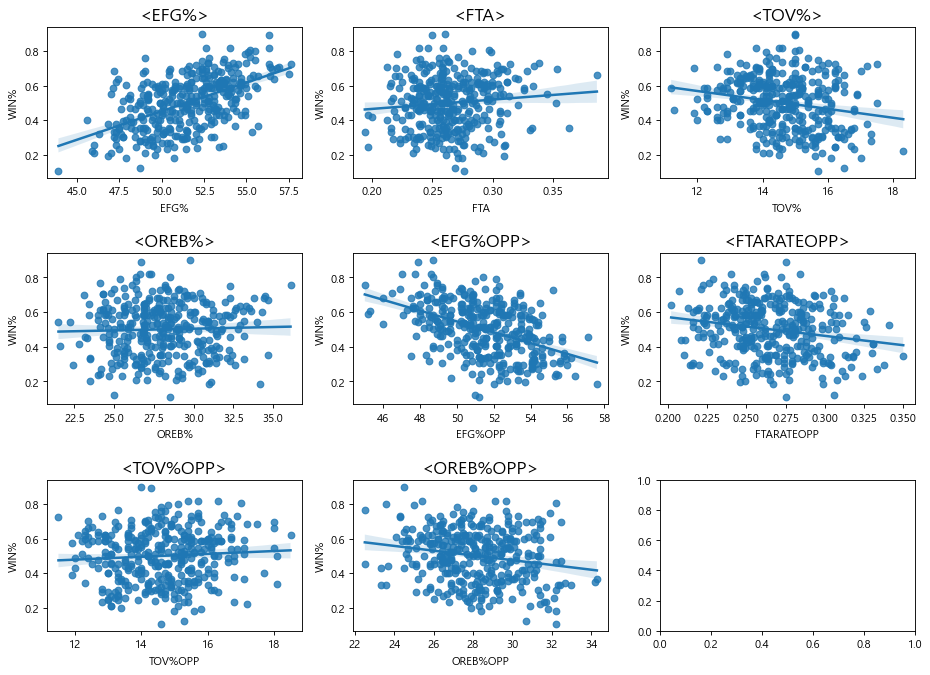

In [26]:
fig, axs = plt.subplots(figsize=(14,10), ncols = 3, nrows=3)
plt.subplots_adjust(hspace = 0.5)
lm_features = ['EFG%','FTA','TOV%','OREB%','EFG%OPP','FTARATEOPP','TOV%OPP','OREB%OPP']
for i, feature in enumerate(lm_features):
    row = int(i/3)
    col = i%3
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현(regplot 기능)
    # ax(축) 자리 지정
    sns.regplot(x=feature, y='WIN%', data = NBA_FrFactors_df, ax = axs[row][col])
    axs[row][col].set_title(f'<{feature}>', fontsize = 16)

In [27]:
df_ffcts.iloc[:,7:]

,EFG%,FTA,TOV%,OREB%,EFG%OPP,FTARATEOPP,TOV%OPP,OREB%OPP,SEASON,Playoffs
1,49.0,0.255,15.4,36.1,45.0,0.236,14.7,29.7,2011-12,1
1,52.8,0.261,14.4,28.2,48.9,0.222,14.6,28.0,2011-12,1
3,51.6,0.334,17.2,30.4,46.5,0.270,15.0,31.3,2011-12,1
4,50.5,0.307,16.3,29.9,47.9,0.277,18.0,30.7,2011-12,1
5,47.4,0.321,15.1,33.3,47.6,0.305,16.1,31.1,2011-12,1
...,...,...,...,...,...,...,...,...,...,...
26,49.0,0.301,14.8,30.3,54.4,0.242,13.3,31.4,2022-23,0
27,49.5,0.249,14.4,30.3,52.6,0.271,15.0,30.0,2022-23,0
27,53.6,0.309,16.7,27.8,53.8,0.260,13.0,26.0,2022-23,0
29,49.6,0.261,14.5,23.5,52.7,0.249,13.4,27.9,2022-23,0


<AxesSubplot:>

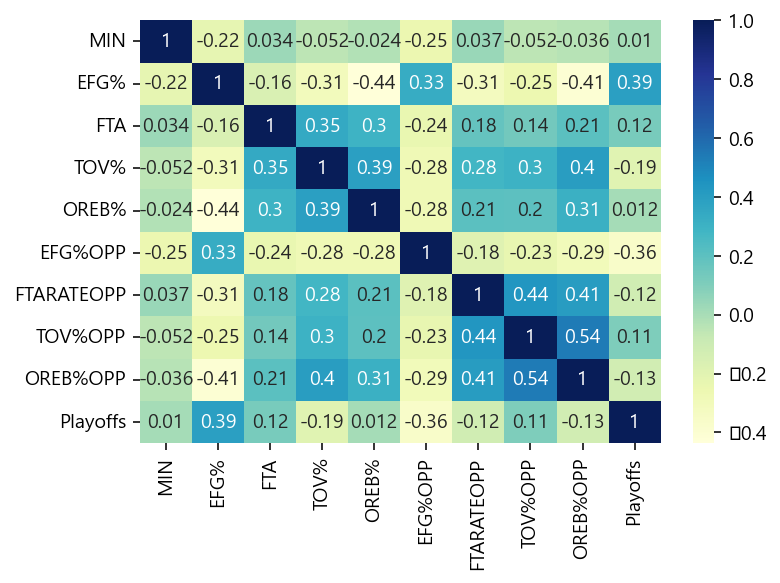

In [28]:
plt.rcParams.update({'figure.dpi'     : '140',
                     'figure.figsize' : [6,4],
                     'font.size'      : '10',
                     'font.family'    : 'Malgun Gothic'})

sns.heatmap(df_ffcts.iloc[:,6:].corr(),annot=True, cmap='YlGnBu')

### 예측

In [30]:
pred = lr_clf.predict(NBA_FrFactors_df[NBA_FrFactors_df['SEASON'] == '2021-22'].iloc[:, 6:-2])
accuracy_score(NBA_FrFactors_df[NBA_FrFactors_df['SEASON'] == '2021-22'].iloc[:, -1], pred)

0.8

In [18]:
NBA_FrFactors_df

,Rank,Team,GP,W,L,WIN%,MIN,EFG%,FTA,TOV%,OREB%,EFG%OPP,FTARATEOPP,TOV%OPP,OREB%OPP,SEASON,Playoffs
1,1,Chicago Bulls,66.0,50.0,16.0,0.758,3188.0,49.0,0.255,15.4,36.1,45.0,0.236,14.7,29.7,2011-12,1
1,1,San Antonio Spurs,66.0,50.0,16.0,0.758,3188.0,52.8,0.261,14.4,28.2,48.9,0.222,14.6,28.0,2011-12,1
3,3,Oklahoma City Thunder,66.0,47.0,19.0,0.712,3198.0,51.6,0.334,17.2,30.4,46.5,0.270,15.0,31.3,2011-12,1
4,4,Miami Heat,66.0,46.0,20.0,0.697,3208.0,50.5,0.307,16.3,29.9,47.9,0.277,18.0,30.7,2011-12,1
5,5,Indiana Pacers,66.0,42.0,24.0,0.636,3198.0,47.4,0.321,15.1,33.3,47.6,0.305,16.1,31.1,2011-12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,26,Indiana Pacers,82.0,25.0,57.0,0.305,3976.0,53.1,0.239,14.5,31.0,55.2,0.256,13.3,27.5,2021-22,0
27,27,Oklahoma City Thunder,82.0,24.0,58.0,0.293,3961.0,49.7,0.223,14.0,25.6,53.3,0.220,13.2,27.3,2021-22,0
28,28,Detroit Pistons,82.0,23.0,59.0,0.280,3956.0,49.4,0.249,14.3,27.6,54.1,0.292,14.7,29.3,2021-22,0
29,29,Orlando Magic,82.0,22.0,60.0,0.268,3956.0,50.3,0.223,14.4,24.9,53.2,0.254,13.1,26.5,2021-22,0


In [34]:
predict_df = df_ffcts[df_ffcts['SEASON'] == '2020-21']

pred = lr_clf.predict(predict_df.iloc[:, 6:-2])
print(accuracy_score(predict_df.iloc[:, -1], pred))

predict_df['Predict'] = pred
predict_df['T/F'] = np.where(pred == predict_df.iloc[:, -2],'True','False')
predict_df


0.8333333333333334


,Rank,Team,GP,W,L,WIN%,MIN,EFG%,FTA,TOV%,OREB%,EFG%OPP,FTARATEOPP,TOV%OPP,OREB%OPP,SEASON,Playoffs,Predict,T/F
1,1,Utah Jazz,72.0,52.0,20.0,0.722,3471.0,56.3,0.244,14.2,28.4,50.7,0.207,11.5,24.3,2020-21,1,1,True
2,2,Phoenix Suns,72.0,51.0,21.0,0.708,3496.0,56.4,0.212,12.6,24.8,53.4,0.250,13.7,25.9,2020-21,1,1,True
3,3,Philadelphia 76ers,72.0,49.0,23.0,0.681,3486.0,54.1,0.293,14.3,27.7,52.1,0.262,15.4,26.3,2020-21,1,1,True
4,4,Brooklyn Nets,72.0,48.0,24.0,0.667,3481.0,57.5,0.258,13.4,25.2,53.1,0.241,12.5,27.4,2020-21,1,1,True
5,5,Denver Nuggets,72.0,47.0,25.0,0.653,3496.0,55.7,0.219,13.6,29.2,54.5,0.258,14.3,24.9,2020-21,1,1,True
5,5,LA Clippers,72.0,47.0,25.0,0.653,3456.0,56.4,0.222,13.5,27.0,53.1,0.239,13.2,24.6,2020-21,1,1,True
7,7,Milwaukee Bucks,72.0,46.0,26.0,0.639,3466.0,56.6,0.233,13.4,26.9,53.6,0.202,12.7,24.5,2020-21,1,1,True
8,8,Dallas Mavericks,72.0,42.0,30.0,0.583,3461.0,55.0,0.242,12.3,25.3,53.4,0.259,12.9,26.6,2020-21,1,1,True
8,8,Los Angeles Lakers,72.0,42.0,30.0,0.583,3491.0,53.6,0.271,15.2,26.9,52.6,0.237,15.2,25.2,2020-21,1,1,True
8,8,Portland Trail Blazers,72.0,42.0,30.0,0.583,3461.0,54.0,0.238,11.2,27.3,54.6,0.258,12.5,26.9,2020-21,1,0,False


In [41]:
predict_df[(predict_df['T/F'] == 'True') & (predict_df['Predict'] == 1)]['Team'].values

array(['Milwaukee Bucks', 'Toronto Raptors', 'Golden State Warriors',
       'Denver Nuggets', 'Houston Rockets', 'Portland Trail Blazers',
       'Philadelphia 76ers', 'Utah Jazz', 'Boston Celtics',
       'Oklahoma City Thunder', 'Indiana Pacers', 'LA Clippers',
       'San Antonio Spurs', 'Brooklyn Nets', 'Orlando Magic'],
      dtype=object)

## Traditional + Four_Factors

In [231]:
df_ffcts = df_ffcts.reset_index(drop=True)
df_Trad = df_Trad.reset_index(drop=True)

In [232]:
Trad_Fact_df = pd.concat([df_ffcts.iloc[:,:-2], df_Trad.iloc[:,7:-2]] ,axis=1)
Trad_Fact_df['Playoffs'] = df_ffcts['Playoffs']
Trad_Fact_df

,Rank,Team,GP,W,L,WIN%,MIN,EFG%,FTA,TOV%,OREB%,EFG%OPP,FTARATEOPP,TOV%OPP,OREB%OPP,PTS,FGM,FGA,FG%,2PM,2PA,2P%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON,group,Playoffs
0,1,Chicago Bulls,66.0,50.0,16.0,0.758,3188.0,49.0,0.255,15.4,36.1,45.0,0.236,14.7,29.7,96.3,37.4,82.8,45.2,31.1,65.9,47.2,6.3,16.9,37.5,15.2,21.1,72.2,13.9,32.8,46.7,23.1,14.0,6.9,5.9,5.2,17.3,17.7,8.2,2011-12,상,1
1,1,San Antonio Spurs,66.0,50.0,16.0,0.758,3188.0,52.8,0.261,14.4,28.2,48.9,0.222,14.6,28.0,103.7,39.6,82.8,47.8,31.2,61.5,50.7,8.4,21.3,39.3,16.2,21.6,74.8,10.3,32.6,43.0,23.2,13.6,7.4,4.4,5.0,17.3,18.8,7.2,2011-12,상,1
2,3,Oklahoma City Thunder,66.0,47.0,19.0,0.712,3198.0,51.6,0.334,17.2,30.4,46.5,0.270,15.0,31.3,103.1,37.3,79.2,47.1,30.1,59.2,50.8,7.2,20.0,35.8,21.3,26.4,80.6,11.0,32.7,43.7,18.5,16.3,7.5,8.2,4.9,20.5,20.0,6.1,2011-12,상,1
3,4,Miami Heat,66.0,46.0,20.0,0.697,3208.0,50.5,0.307,16.3,29.9,47.9,0.277,18.0,30.7,98.5,37.1,79.0,46.9,31.5,63.4,49.7,5.6,15.6,35.9,18.8,24.2,77.5,10.4,31.2,41.6,20.0,15.2,8.9,5.4,4.2,19.4,20.5,6.0,2011-12,상,1
4,5,Indiana Pacers,66.0,42.0,24.0,0.636,3198.0,47.4,0.321,15.1,33.3,47.6,0.305,16.1,31.1,97.7,35.7,81.4,43.8,29.8,65.3,45.6,5.9,16.1,36.8,20.4,26.1,78.2,12.5,31.4,43.9,18.6,14.0,7.9,5.4,6.0,21.7,21.6,3.3,2011-12,상,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,26,Detroit Pistons,11.0,3.0,8.0,0.273,528.0,49.0,0.301,14.8,30.3,54.4,0.242,13.3,31.4,107.7,37.7,88.5,42.6,26.3,54.8,48.0,11.4,33.7,33.7,20.9,26.6,78.5,11.7,32.2,43.9,21.2,14.9,6.4,4.0,8.3,22.5,21.8,-9.7,2022-23,하,0
356,27,Charlotte Hornets,12.0,3.0,9.0,0.250,586.0,49.5,0.249,14.4,30.3,52.6,0.271,15.0,30.0,107.9,40.3,92.3,43.7,29.5,59.7,49.4,10.8,32.6,33.0,16.5,23.0,71.7,12.8,32.8,45.6,26.1,14.7,7.7,6.0,7.4,20.6,20.5,-5.2,2022-23,하,0
357,27,Orlando Magic,12.0,3.0,9.0,0.250,581.0,53.6,0.309,16.7,27.8,53.8,0.260,13.0,26.0,110.1,40.2,83.8,47.9,30.6,54.5,56.1,9.6,29.3,32.8,20.2,25.9,77.8,9.7,36.0,45.7,21.1,16.8,6.1,5.8,4.1,22.6,21.8,-3.6,2022-23,하,0
358,29,Los Angeles Lakers,10.0,2.0,8.0,0.200,485.0,49.6,0.261,14.5,23.5,52.7,0.249,13.4,27.9,108.4,40.2,90.5,44.4,30.9,58.5,52.8,9.3,32.0,29.1,18.7,23.6,79.2,9.6,35.5,45.1,23.2,15.2,7.8,5.5,5.8,20.1,20.5,-7.9,2022-23,하,0


In [233]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy  = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall    = recall_score(y_test, pred)
    f1        = f1_score(y_test, pred)
    # roc_auc   = roc_auc_score(y_test,pred_proba)
    
    print(confusion)
    print(f'정확도 : {accuracy:.4f} \n정밀도 : {precision:.4f} \n재현율 : {recall:.4f} \nF1_스코어 : {f1:.4f} \nAUC : ')
# get_clf_eval(y_test,pred,pred_proba)


from sklearn.model_selection import train_test_split

X = features = Trad_Fact_df.drop(columns = ['Rank','Team','GP','W','L','WIN%','MIN','Playoffs','SEASON','+/-'])
y = labels   = Trad_Fact_df.loc[:,'Playoffs']

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=1)

# 모델 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 3)
xgb_clf = XGBClassifier()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('DecisionTree 정확도 : ' ,accuracy_score(y_test,pred).round(4))
get_clf_eval(y_test, pred)
print('〓'*30)

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print('RandomForest 정확도 : ' ,accuracy_score(y_test,pred).round(4))
get_clf_eval(y_test, pred)
print('〓'*30)

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
print('Logistic Regression 정확도 : ' ,accuracy_score(y_test,pred).round(4))
get_clf_eval(y_test, pred, pred_proba)

# KNeighborsClassifier 학습/예측/평가
knn_clf.fit(X_train,y_train)
pred = knn_clf.predict(X_test)
print('KNeighborsClassifier 정확도 : ' ,accuracy_score(y_test,pred).round(4))


# XGBClassifier 학습/예측/평가
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate = 0.05, max_depth = 3, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose = True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,-1]
print('XGBClassifier 정확도 :', accuracy_score(y_test, w_preds).round(4))
print('XGBClassifier AUC :', roc_auc_score(y_test, w_pred_proba))

print('〓'*40)
print('피처 중요도 : \n', dt_clf.feature_importances_)
print('〓'*40)
print('피처 이름 : \n', dt_clf.feature_names_in_)
print('〓'*40)
print(pd.Series(data = dt_clf.feature_importances_, index = dt_clf.feature_names_in_))
print('〓'*40)
print(pd.Series(data = dt_clf.feature_importances_, index = dt_clf.feature_names_in_).sort_values(ascending = False))

ValueError: could not convert string to float: '하'

In [218]:
predict_df = Trad_Fact_df[Trad_Fact_df['SEASON'] == '2019-20']
pred = lr_clf.predict(predict_df.iloc[:, 7:-3])
print(accuracy_score(predict_df.iloc[:, -1],pred))

predict_df['Predict'] = pred

predict_df['T/F'] = np.where(pred == predict_df.iloc[:, -2],'True','False')
predict_df

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### 히트맵으로 상관계수 피처 찾기

In [313]:
plt.rcParams.update({'figure.dpi'     : '140',
                     'figure.figsize' : [9,6],
                     'font.size'      : '10',
                     'font.family'    : 'Malgun Gothic'})

<AxesSubplot:>

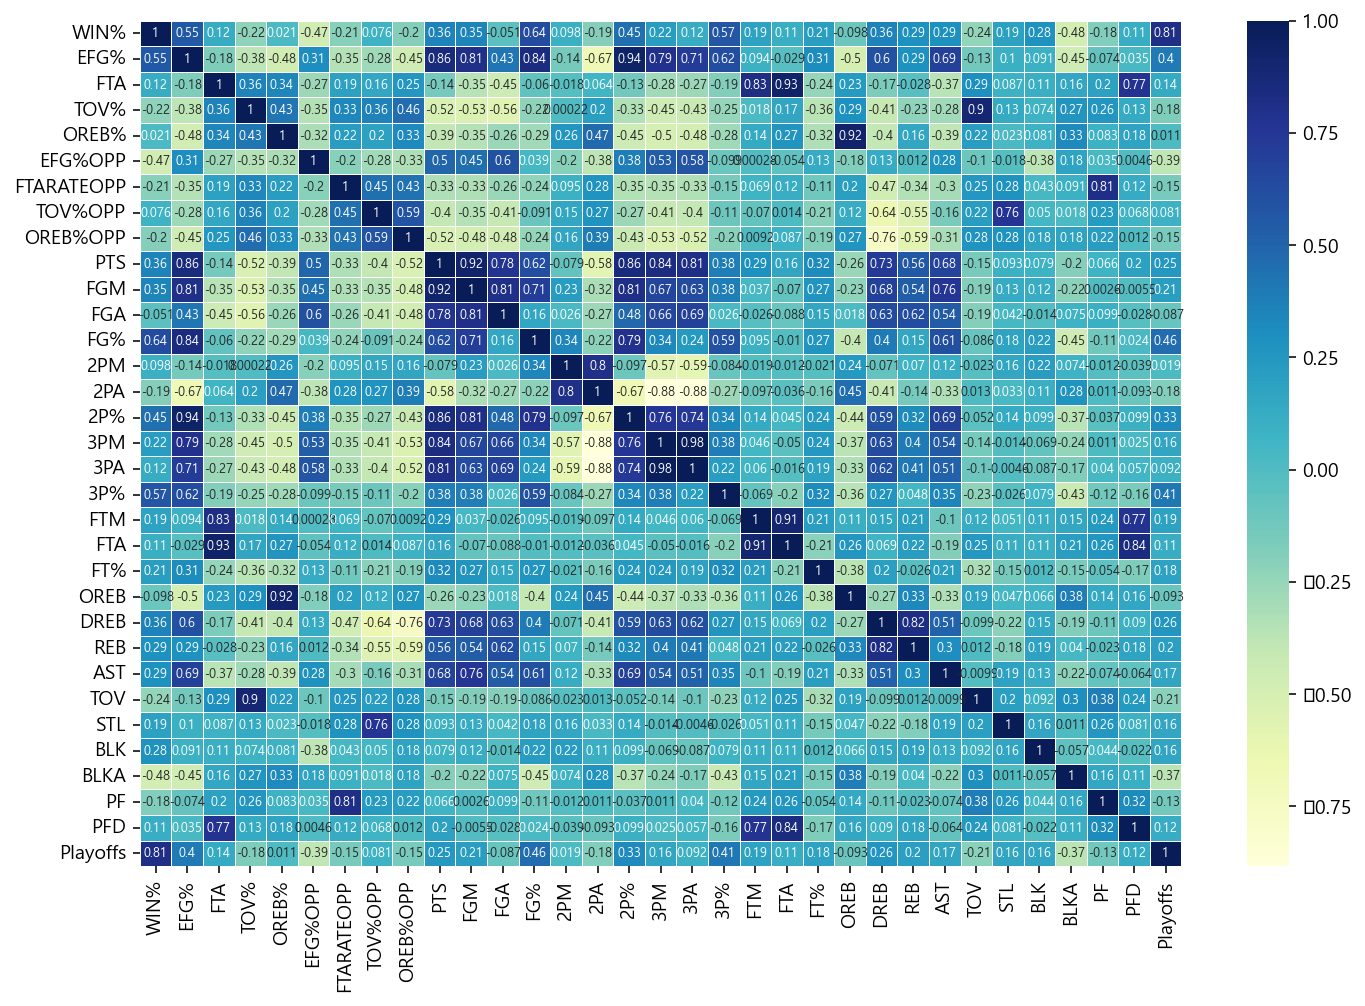

In [42]:
plt.figure(figsize = (12,8))
sns.heatmap(Trad_Fact_df.drop(columns = ['Rank','Team','GP','W','L','MIN','SEASON','+/-']).corr(), annot = True, cmap='YlGnBu',annot_kws={"size": 6.5}, linewidths=.5 )

In [173]:
print('<Playoffs 기준 상관성 리스트>')
print(abs(Trad_Fact_df.drop(columns = ['Rank','Team','GP','W','L','MIN','SEASON','+/-','WIN%']).corr()['Playoffs']).sort_values(ascending = False)[:12])
print('〓'*30)
print('<순서별 칼럼이름 추출>')
print(list(abs(Trad_Fact_df.drop(columns = ['Rank','Team','GP','W','L','MIN','SEASON','+/-','WIN%']).corr()['Playoffs']).sort_values(ascending = False)[:12].index))

<Playoffs 기준 상관성 리스트>
Playoffs    1.000000
FG%         0.455850
3P%         0.408616
EFG%        0.403984
EFG%OPP     0.387106
BLKA        0.374505
2P%         0.326265
DREB        0.261878
PTS         0.246984
TOV         0.210271
FGM         0.209937
REB         0.201663
Name: Playoffs, dtype: float64
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
<순서별 칼럼이름 추출>
['Playoffs', 'FG%', '3P%', 'EFG%', 'EFG%OPP', 'BLKA', '2P%', 'DREB', 'PTS', 'TOV', 'FGM', 'REB']


In [98]:
Trad_Fact_df[['PTS' , 'FG%' , '2P%' , '3P%' , 'EFG%' , 'EFG%OPP' , 'FGM' , 'REB' , 'DREB' , 'BLKA' , 'TOV','SEASON','Playoffs']]

,PTS,FG%,2P%,3P%,EFG%,EFG%OPP,FGM,REB,DREB,BLKA,TOV,SEASON,Playoffs
0,96.3,45.2,47.2,37.5,49.0,45.0,37.4,46.7,32.8,5.2,14.0,2011-12,1
1,103.7,47.8,50.7,39.3,52.8,48.9,39.6,43.0,32.6,5.0,13.6,2011-12,1
2,103.1,47.1,50.8,35.8,51.6,46.5,37.3,43.7,32.7,4.9,16.3,2011-12,1
3,98.5,46.9,49.7,35.9,50.5,47.9,37.1,41.6,31.2,4.2,15.2,2011-12,1
4,97.7,43.8,45.6,36.8,47.4,47.6,35.7,43.9,31.4,6.0,14.0,2011-12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,111.5,46.3,54.0,34.4,53.1,55.2,41.4,43.9,32.6,4.9,14.4,2021-22,0
326,103.7,43.0,50.7,32.3,49.7,53.3,38.3,45.6,35.2,6.0,14.0,2021-22,0
327,104.8,43.1,49.8,32.6,49.4,54.1,38.2,43.0,32.0,5.2,14.2,2021-22,0
328,104.2,43.4,50.8,33.1,50.3,53.2,38.3,44.3,35.2,5.2,14.5,2021-22,0


### 상관계수 피처로 모델학습/예측/평가

In [180]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy  = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall    = recall_score(y_test, pred)
    f1        = f1_score(y_test, pred)
    # roc_auc   = roc_auc_score(y_test,pred_proba)
        
    print(confusion)
    print(f'정확도 : {accuracy:.4f} \n정밀도 : {precision:.4f} \n재현율 : {recall:.4f} \nF1_스코어 : {f1:.4f} \nAUC : ')
# get_clf_eval(y_test,pred,pred_proba)


from sklearn.model_selection import train_test_split

X = features = Trad_Fact_df[['PTS' , 'FG%' , '2P%' , '3P%' , 'EFG%' , 'EFG%OPP' , 'FGM' , 'REB' , 'DREB' , 'BLKA' , 'TOV']]
y = labels   = Trad_Fact_df.loc[:,'Playoffs']

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=2)

# 모델 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 3)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('DecisionTree 정확도 : ' ,accuracy_score(y_test,pred).round(4))
get_clf_eval(y_test, pred)
print('〓'*30)

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print('RandomForest 정확도 : ' ,accuracy_score(y_test,pred).round(4))
get_clf_eval(y_test, pred)
print('〓'*30)

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
print('Logistic Regression 정확도 : ' ,accuracy_score(y_test,pred).round(4))
get_clf_eval(y_test, pred, pred_proba)

# KNeighborsClassifier 학습/예측/평가
knn_clf.fit(X_train,y_train)
pred = knn_clf.predict(X_test)
print('KNeighborsClassifier 정확도 : ' ,accuracy_score(y_test,pred).round(4))

print('〓'*40)
print('피처 중요도 : \n', dt_clf.feature_importances_)
print('〓'*40)
print('피처 이름 : \n', dt_clf.feature_names_in_)
print('〓'*40)
print(pd.Series(data = dt_clf.feature_importances_, index = dt_clf.feature_names_in_))
print('〓'*40)
print(pd.Series(data = dt_clf.feature_importances_, index = dt_clf.feature_names_in_).sort_values(ascending = False))

DecisionTree 정확도 :  0.6944
[[37 15]
 [18 38]]
정확도 : 0.6944 
정밀도 : 0.7170 
재현율 : 0.6786 
F1_스코어 : 0.6972 
AUC : 
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
RandomForest 정확도 :  0.8056
[[39 13]
 [ 8 48]]
정확도 : 0.8056 
정밀도 : 0.7869 
재현율 : 0.8571 
F1_스코어 : 0.8205 
AUC : 
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
Logistic Regression 정확도 :  0.8796
[[45  7]
 [ 6 50]]
정확도 : 0.8796 
정밀도 : 0.8772 
재현율 : 0.8929 
F1_스코어 : 0.8850 
AUC : 
KNeighborsClassifier 정확도 :  0.787
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
피처 중요도 : 
 [0.00798682 0.22515233 0.00798682 0.12270825 0.05752296 0.19925265
 0.12752334 0.05330102 0.07473377 0.0369294  0.08690265]
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
피처 이름 : 
 ['PTS' 'FG%' '2P%' '3P%' 'EFG%' 'EFG%OPP' 'FGM' 'REB' 'DREB' 'BLKA' 'TOV']
〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓〓
PTS        0.007987
FG%        0.225152
2P%        0.007987
3P%        0.122708
EFG%       0.057523
EFG%OPP    0.199253
FGM        0.127523
REB        0.053301
DREB       0.074734
BLKA       0.036929
TOV        0.08690

In [168]:
Trad_Fact_df[Trad_Fact_df['SEASON'] == '2020-21']['Playoffs']
# FG%	3P%	EFG%	EFG%OPP	BLKA	2P%	DREB	PTS	TOV	FGM	REB

270    1
271    1
272    1
273    1
274    1
275    1
276    1
277    1
278    1
279    1
280    1
281    1
282    1
283    0
284    1
285    1
286    0
287    1
288    0
289    0
290    0
291    0
292    0
293    0
294    0
295    0
296    0
297    0
298    0
299    0
Name: Playoffs, dtype: int64

In [138]:
predict_df = Trad_Fact_df[Trad_Fact_df['SEASON'] == '2019-20'][['PTS' , 'FG%' , '2P%' , '3P%' , 'EFG%' , 'EFG%OPP' , 'FGM' , 'REB' , 'DREB' , 'BLKA' , 'TOV','SEASON','Playoffs']]

pred = lr_clf.predict(predict_df.iloc[:,:-2])
print(accuracy_score(predict_df.iloc[:, -1], pred))


predict_df['Predict'] = pred
predict_df['T/F'] = np.where(pred == predict_df.iloc[:, -2],'True','False')
predict_df

0.9666666666666667


,PTS,FG%,2P%,3P%,EFG%,EFG%OPP,FGM,REB,DREB,BLKA,TOV,SEASON,Playoffs,Predict,T/F
240,118.7,47.6,56.7,35.5,55.2,48.9,43.3,51.7,42.2,4.5,15.1,2019-20,1,1,True
241,112.8,45.8,51.9,37.4,53.6,50.2,40.2,45.4,35.9,5.5,14.8,2019-20,1,1,True
242,113.4,48.0,55.2,34.9,54.2,51.5,42.3,45.7,35.1,3.7,15.2,2019-20,1,1,True
243,116.3,46.6,52.4,37.1,53.5,50.6,41.6,47.7,37.0,4.7,14.6,2019-20,1,1,True
244,113.7,46.1,52.1,36.4,53.1,50.9,41.3,46.1,35.4,5.5,13.8,2019-20,1,1,True
245,111.3,47.3,53.2,35.9,53.5,53.3,42.0,44.1,33.4,4.4,13.8,2019-20,1,1,True
246,109.4,47.6,52.7,36.3,53.4,51.1,42.1,42.8,34.1,4.6,13.2,2019-20,1,1,True
247,117.8,45.1,55.9,34.5,53.7,52.9,40.8,44.3,34.5,4.9,14.7,2019-20,1,1,True
248,110.4,46.8,53.0,35.5,53.0,51.8,40.0,42.9,34.7,4.0,13.7,2019-20,1,1,True
249,111.3,47.1,53.5,38.0,54.9,51.8,40.1,44.9,35.8,4.6,15.1,2019-20,1,1,True


In [147]:
predict_df.groupby('Predict').mean()

,PTS,FG%,2P%,3P%,EFG%,EFG%OPP,FGM,REB,DREB,BLKA,TOV,Playoffs
Predict,,,,,,,,,,,,
0,109.926667,45.393333,51.446667,35.226667,51.933333,54.273333,40.42,43.88,33.580000,5.220000,14.873333,0.066667
1,113.440000,46.586667,53.346667,36.326667,53.733333,51.613333,41.24,45.70,35.853333,4.586667,14.260000,1.000000


In [156]:
predict_df.groupby('Predict').agg([max,min])

PTS          FG%         2P%         3P%        EFG%       EFG%OPP  \
           max    min   max   min   max   min   max   min   max   min     max   
Predict                                                                         
0        115.8  102.9  47.2  43.4  53.2  48.8  37.6  33.3  53.9  49.7    56.0   
1        118.7  109.4  48.0  44.8  56.7  51.3  38.0  34.3  55.2  52.0    53.3   

                FGM         REB        DREB       BLKA        TOV        \
          min   max   min   max   min   max   min  max  min   max   min   
Predict                                                                   
0        52.1  42.6  37.3  46.5  41.7  36.2  31.4  6.4  4.2  16.5  12.6   
1        48.9  43.3  39.5  51.7  42.8  42.2  33.4  5.5  3.7  15.3  12.7   

          SEASON          Playoffs       T/F         
             max      min      max min   max    min  
Predict                                              
0        2019-20  2019-20        1   0  True  False  
1        2019-20  2019-20        1   1  True   True

In [128]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300,random_state = 1)
kmeans.fit(X)
X['cluster'] = kmeans.labels_
X.groupby('cluster').mean()

,PTS,FG%,2P%,3P%,EFG%,EFG%OPP,FGM,REB,DREB,BLKA,TOV
cluster,,,,,,,,,,,
0,99.820904,44.877401,48.530508,35.125424,49.625989,50.370056,37.468927,42.770621,32.084181,4.981921,14.360452
1,111.107843,46.552288,52.664706,36.172549,53.196078,52.349020,40.862092,44.611765,34.386928,4.766667,14.166667


In [137]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300,random_state = 1)
kmeans.fit(predict_df.drop(['SEASON','T/F'],axis=1))
predict_df['cluster'] = kmeans.labels_
# X.groupby('cluster').mean()
predict_df

,PTS,FG%,2P%,3P%,EFG%,EFG%OPP,FGM,REB,DREB,BLKA,TOV,SEASON,Playoffs,Predict,T/F,cluster
240,118.7,47.6,56.7,35.5,55.2,48.9,43.3,51.7,42.2,4.5,15.1,2019-20,1,1,True,0
241,112.8,45.8,51.9,37.4,53.6,50.2,40.2,45.4,35.9,5.5,14.8,2019-20,1,1,True,0
242,113.4,48.0,55.2,34.9,54.2,51.5,42.3,45.7,35.1,3.7,15.2,2019-20,1,1,True,0
243,116.3,46.6,52.4,37.1,53.5,50.6,41.6,47.7,37.0,4.7,14.6,2019-20,1,1,True,0
244,113.7,46.1,52.1,36.4,53.1,50.9,41.3,46.1,35.4,5.5,13.8,2019-20,1,1,True,0
245,111.3,47.3,53.2,35.9,53.5,53.3,42.0,44.1,33.4,4.4,13.8,2019-20,1,1,True,0
246,109.4,47.6,52.7,36.3,53.4,51.1,42.1,42.8,34.1,4.6,13.2,2019-20,1,1,True,0
247,117.8,45.1,55.9,34.5,53.7,52.9,40.8,44.3,34.5,4.9,14.7,2019-20,1,1,True,0
248,110.4,46.8,53.0,35.5,53.0,51.8,40.0,42.9,34.7,4.0,13.7,2019-20,1,1,True,0
249,111.3,47.1,53.5,38.0,54.9,51.8,40.1,44.9,35.8,4.6,15.1,2019-20,1,1,True,0


In [131]:
from sklearn.metrics import silhouette_samples, silhouette_score
# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score = silhouette_samples(X, kmeans.labels_)
print(score.shape)

# irisDF에 실루엣 계수 칼럼 추가
X['silhouette_coeff'] = score

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(X, kmeans.labels_)
print(f'붓꽃 데이트 세트 Silhouette Analysis Score : {average_score:.3f}')
X

(330,)
붓꽃 데이트 세트 Silhouette Analysis Score : 0.423


,PTS,FG%,2P%,3P%,EFG%,EFG%OPP,FGM,REB,DREB,BLKA,TOV,cluster,silhouette_coeff
0,96.3,45.2,47.2,37.5,49.0,45.0,37.4,46.7,32.8,5.2,14.0,0,0.473379
1,103.7,47.8,50.7,39.3,52.8,48.9,39.6,43.0,32.6,5.0,13.6,0,0.106267
2,103.1,47.1,50.8,35.8,51.6,46.5,37.3,43.7,32.7,4.9,16.3,0,0.277842
3,98.5,46.9,49.7,35.9,50.5,47.9,37.1,41.6,31.2,4.2,15.2,0,0.531105
4,97.7,43.8,45.6,36.8,47.4,47.6,35.7,43.9,31.4,6.0,14.0,0,0.549838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,111.5,46.3,54.0,34.4,53.1,55.2,41.4,43.9,32.6,4.9,14.4,1,0.555882
326,103.7,43.0,50.7,32.3,49.7,53.3,38.3,45.6,35.2,6.0,14.0,0,0.177508
327,104.8,43.1,49.8,32.6,49.4,54.1,38.2,43.0,32.0,5.2,14.2,0,0.202183
328,104.2,43.4,50.8,33.1,50.3,53.2,38.3,44.3,35.2,5.2,14.5,0,0.145240


In [1]:
# 팀이름 약어
team_dict = {'Boston Celtics':'BOS' , 'Golden State Warriors':'GSW' , 'Phoenix Suns':'PHX' , 'New York Knicks':'NYK',
             'Miami Heat':'MIA' , 'LA Clippers':'LAC' , 'Cleveland Cavaliers':'CLE' , 'Brooklyn Nets':'BKN',
             'Utah Jazz':'UTA' , 'Memphis Grizzlies':'MEM', 'Milwaukee Bucks':'MIL' , 'Oklahoma City Thunder':'OKC', 
             'Dallas Mavericks':'DAL' , 'Orlando Magic':'ORL', 'Philadelphia 76ers':'PHI',
             'Minnesota Timberwolves':'MIN', 'Toronto Raptors':'TOR', 'Washington Wizards':'WAS',
             'San Antonio Spurs':'SAS', 'Charlotte Hornets':'CHA', 'Los Angeles Lakers':'LAL',
             'Denver Nuggets':'DEN', 'New Orleans Pelicans':'NOP', 'Detroit Pistons':'DET',
             'Atlanta Hawks':'ATL', 'Chicago Bulls':'CHI', 'Portland Trail Blazers':'POR',
             'Sacramento Kings':'SAC', 'Houston Rockets':'HOU', 'Indiana Pacers':'IND'} 

#### 다중공선성, VIF

In [215]:
Trad_Fact_df.drop(columns = ['Rank','Team','GP','W','L','MIN','SEASON','+/-']).columns

Index(['WIN%', 'EFG%', 'FTA', 'TOV%', 'OREB%', 'EFG%OPP', 'FTARATEOPP',
       'TOV%OPP', 'OREB%OPP', 'PTS', 'FGM', 'FGA', 'FG%', '2PM', '2PA', '2P%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'Playoffs'],
      dtype='object')

In [246]:
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor

df['intercept'] = 1
lm = sm.OLS(Trad_Fact_df['Playoffs'], Trad_Fact_df[['EFG%', 'FTA','TOV%','OREB%','PTS','FGM','FGA','FG%']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Playoffs   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.700
Method:                 Least Squares   F-statistic:                              86.72
Date:                Mon, 07 Nov 2022   Prob (F-statistic):                    1.63e-80
Time:                        17:41:17   Log-Likelihood:                         -161.09
No. Observations:                 330   AIC:                                      340.2
Df Residuals:                     321   BIC:                                      374.4
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EFG%           0.0307      0.062      0.497      0.620      -0.091       0.152
FTA          -31.5791     18.006     -1.754      0.080     -67.004       3.846
FTA            0.3522      0.213      1.650      0.100      -0.068       0.772
TOV%          -0.1390      0.025     -5.616      0.000      -0.188      -0.090
OREB%          0.0633      0.011      5.752      0.000       0.042       0.085
PTS            0.0483      0.033      1.444      0.150      -0.018       0.114
FGM           -0.2969      0.143     -2.080      0.038      -0.578      -0.016
FGA           -0.0767      0.010     -7.492      0.000      -0.097      -0.057
FG%            0.2780      0.122      2.279      0.023       0.038       0.518
==============================================================================
Omnibus:                       33.294   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.578
Skew:                          -0.074   Prob(JB):                      0.00505
Kurtosis:                       2.136   Cond. No.                     1.32e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y, X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

In [ ]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [217]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(lm.exog, i)}
             for i, column in enumerate(lm.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,EFG%,20808.471259
1,FTA,47723.855885
2,FTA,48688.266748
3,TOV%,272.879405
4,OREB%,199.625126
5,PTS,25622.421533
6,FGM,64317.626567
7,FGA,1585.030515
8,FG%,64110.422611


In [218]:
variance_inflation_factor(lm.exog_names,1)

AttributeError: 'list' object has no attribute 'shape'

In [201]:
y, X = dmatrices('WIN% ~  EFG% + FTA + TOV% + OREB% + EFG%OPP + FTARATEOPP+ TOV%OPP + OREB%OPP + Playoffs +PTS +FGM +FGA +FG% +2PM+2PA +2P% +3PM +3PA + 3P%+ FTM+ FTA+ FT%+ OREB+ DREB+REB+ AST+ TOV+ STL+ BLK+ BLKA+ PF+ PFD', df, return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

SyntaxError: invalid syntax (<unknown>, line 1)

In [53]:
X

,EFG%,FG%,2P%,3P%,DREB
0,49.0,45.2,47.2,37.5,32.8
1,52.8,47.8,50.7,39.3,32.6
2,51.6,47.1,50.8,35.8,32.7
3,50.5,46.9,49.7,35.9,31.2
4,47.4,43.8,45.6,36.8,31.4
...,...,...,...,...,...
325,53.1,46.3,54.0,34.4,32.6
326,49.7,43.0,50.7,32.3,35.2
327,49.4,43.1,49.8,32.6,32.0
328,50.3,43.4,50.8,33.1,35.2


In [168]:
driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz').text.split('\n')

['  TEAM GP W L MIN OFFRTG DEFRTG NETRTG AST% AST/TO AST',
 'RATIO OREB% DREB% REB% TOV% EFG% TS% PACE PIE POSS',
 '',
 '1 Milwaukee Bucks 9 9 0 432.0 112.0 100.6 11.5 59.0 1.64 17.2 30.5 76.3 53.7 14.6 52.8 56.0 100.67 57.4 907',
 '2 Cleveland Cavaliers 9 8 1 447.0 114.8 102.9 12.0 60.5 1.67 18.0 28.3 75.1 52.3 14.8 54.8 59.1 97.72 56.5 911',
 '2 Utah Jazz 11 8 3 538.0 114.1 109.0 5.0 64.9 1.70 18.9 32.0 67.3 49.7 15.9 54.6 57.7 100.37 53.4 1,122',
 '4 Memphis Grizzlies 10 7 3 485.0 114.8 113.6 1.2 55.8 1.63 16.8 33.9 69.7 51.7 14.5 53.9 56.8 100.65 51.0 1,020',
 '4 Phoenix Suns 9 7 2 437.0 116.4 105.1 11.3 68.0 2.11 20.1 30.7 71.0 51.1 13.7 54.5 58.4 97.76 56.9 890',
 '6 Atlanta Hawks 9 6 3 437.0 113.2 112.5 0.7 58.9 2.14 18.1 29.3 67.6 48.6 11.9 52.4 56.1 101.55 51.7 926',
 '6 Boston Celtics 9 6 3 442.0 117.5 113.7 3.8 61.6 1.84 18.5 23.3 73.2 49.1 13.6 57.2 61.7 98.99 51.9 910',
 '6 Denver Nuggets 9 6 3 432.0 115.3 113.3 2.0 65.4 1.88 20.1 27.1 74.4 51.2 15.1 57.8 60.1 100.94 51.8 

# 경기별

### 실험 과정

In [240]:
driver_match = webdriver.Chrome('chromedriver.exe')

In [241]:
driver_match.get('https://www.nba.com/stats/teams/boxscores-advanced?Season=2021-22')
match_text = driver_match.find_element(By.CLASS_NAME ,'Crom_base__f0niE').text.split('\n')
match_text

['GLOSSARY',
 'SHARE',
 '2460 Rows',
 ' • Page',
 'All',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 'of 50',
 '',
 'TEAM MATCH UP GAME DATE W/L MIN OFFRTG DEFRTG NETRTG AST% AST/TO AST',
 'RATIO OREB% DREB% REB% TOV% EFG% TS% PACE PIE',
 'CLE CLE vs. MIL 04/10/2022 W 48 127.9 109.5 18.4 76.5 3.25 25.5 22.2 76.9 51.5 11.5 64.4 65.5 104.50 56.5',
 'LAL LAL @ DEN 04/10/2022 W 53 129.2 122.6 6.6 59.1 2.00 16.7 32.7 70.4 51.9 11.5 55.3 63.7 103.25 52.1',
 'UTA UTA @ POR 04/10/2022 W 48 112.1 81.6 30.5 62.2 1.35 16.1 42.0 86.8 65.0 17.2 50.6 56.2 98.50 69.7',
 'SAC SAC @ PHX 04/10/2022 W 48 117.2 110.1 7.1 65.0 1.73 19.7 17.9 63.5 46.1 15.2 61.8 65.0 99.00 56.8',
 'DAL DAL vs. SAS 04/10/2022 W 48 1

In [247]:
match_text[57:][0]

'TEAM MATCH UP GAME DATE W/L MIN OFFRTG DEFRTG NETRTG AST% AST/TO AST'

In [248]:
match_text[57:][1]

'RATIO OREB% DREB% REB% TOV% EFG% TS% PACE PIE'

In [261]:
match_columns1 = match_text[57:][0].replace('UP','').replace('GAME','').split()
match_columns1

['TEAM',
 'MATCH',
 'DATE',
 'W/L',
 'MIN',
 'OFFRTG',
 'DEFRTG',
 'NETRTG',
 'AST%',
 'AST/TO',
 'AST']

In [264]:
match_columns2 = match_text[57:][1].replace('RATIO','').split()
match_columns2

['OREB%', 'DREB%', 'REB%', 'TOV%', 'EFG%', 'TS%', 'PACE', 'PIE']

In [266]:
match_columns = match_columns1 + match_columns2
match_columns

['TEAM',
 'MATCH',
 'DATE',
 'W/L',
 'MIN',
 'OFFRTG',
 'DEFRTG',
 'NETRTG',
 'AST%',
 'AST/TO',
 'AST',
 'OREB%',
 'DREB%',
 'REB%',
 'TOV%',
 'EFG%',
 'TS%',
 'PACE',
 'PIE']

In [270]:

t = re.compile('\d{2}[/]+\d{2}[/]+\d{4}')
t.findall(match_text[57:][2:][2])

['04/10/2022']

In [272]:
match_text[57:][2:][0][:3]

'CLE'

In [287]:
match_text[57:][2:][0].split()[4:]

['04/10/2022',
 'W',
 '48',
 '127.9',
 '109.5',
 '18.4',
 '76.5',
 '3.25',
 '25.5',
 '22.2',
 '76.9',
 '51.5',
 '11.5',
 '64.4',
 '65.5',
 '104.50',
 '56.5']

In [331]:
t = re.compile(' [a-zA-Z]{3}.+[a-zA-Z]{3}')
t.search(match_text[57:][2:][4]).group().strip()

'DAL vs. SAS'

In [288]:
match_text[57:][2:][0]

'CLE CLE vs. MIL 04/10/2022 W 48 127.9 109.5 18.4 76.5 3.25 25.5 22.2 76.9 51.5 11.5 64.4 65.5 104.50 56.5'

In [335]:
match_columns

['TEAM',
 'MATCH',
 'DATE',
 'W/L',
 'MIN',
 'OFFRTG',
 'DEFRTG',
 'NETRTG',
 'AST%',
 'AST/TO',
 'AST',
 'OREB%',
 'DREB%',
 'REB%',
 'TOV%',
 'EFG%',
 'TS%',
 'PACE',
 'PIE']

### url 불러오는 함수

In [346]:
def make_teams_stats_url(option, year):
    season = str(year) + ('-') + str(year+1)[2:]    
    base_url = 'https://www.nba.com/stats/teams/boxscores-'
    opt1 = option
    opt2 = '?Season=' + season
    url = base_url + opt1 + opt2
    return url

### g_advanced_2122

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import numpy as np
import pandas as pd
from datetime import datetime
import time
import math
import datetime
import re

start = time.time()

driver_match = webdriver.Chrome('chromedriver.exe')
driver_match.get(make_teams_stats_url('advanced',2021))
time.sleep(3)

driver_match.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div[2]/div[3]/section[2]/div/div[2]/div[2]/div[1]/div[3]/div/label/div/select/option[1]').click()

match_text = driver_match.find_element(By.CLASS_NAME ,'Crom_base__f0niE').text.split('\n')
match_columns1 = match_text[57:][0].replace('UP','').replace('GAME','').split()
match_columns2 = match_text[57:][1].replace('RATIO','').split()
match_columns = match_columns1 + match_columns2
match_text_values = match_text[57:][2:]


t = re.compile(' [a-zA-Z]{3}.+[a-zA-Z]{3}')

match_teams = []
match_vs_team = []
match_values = []


for i in range(len(match_text_values)):
    team = match_text_values[i][:3]
    team_vs = t.search(match_text_values[i]).group().strip()
    values  = match_text_values[i].split()[4:]
    
    match_teams.append(team)
    match_vs_team.append(team_vs)
    match_values.append(values)
    
match_teams
match_vs_team
match_values

end = time.time()

# 크롤링 시간 측정
sec = (end - start)
result = datetime.timedelta(seconds=sec)
print(result)
result_list = str(datetime.timedelta(seconds=sec)).split(".")
print(result_list[0])


g_advanced_2122 = pd.DataFrame(data = match_values , columns = match_columns[2:])
g_advanced_2122.insert(0, 'Team',match_teams)
g_advanced_2122.insert(1, 'MATCH UP',match_vs_team)
g_advanced_2122

: 

### g_traditional_2122

In [361]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import numpy as np
import pandas as pd
from datetime import datetime
import time
import math
import datetime
import re

start = time.time()

driver_match = webdriver.Chrome('chromedriver.exe')
driver_match.get(make_teams_stats_url('traditional',2021))
time.sleep(3)

driver_match.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div[2]/div[3]/section[2]/div/div[2]/div[2]/div[1]/div[3]/div/label/div/select/option[1]').click()

match_text = driver_match.find_element(By.CLASS_NAME ,'Crom_base__f0niE').text.split('\n')
match_columns1 = match_text[56:][0].replace('UP','').replace('GAME','').split()
match_text_values = match_text[56:][2:]
match_text_values

['PHX PHX vs. SAC 04/10/2022 L 48 109 42 103 40.8 14 47 29.8 11 15 73.3 18 32 50 27 11 9 7 25 -7',
 'ATL ATL @ HOU 04/10/2022 W 48 130 45 87 51.7 21 38 55.3 19 24 79.2 13 37 50 29 13 4 4 19 16',
 'MEM MEM vs. BOS 04/10/2022 L 48 110 39 102 38.2 15 47 31.9 17 27 63.0 19 26 45 27 10 11 6 16 -29',
 'LAL LAL @ DEN 04/10/2022 W 53 146 44 94 46.8 16 43 37.2 42 47 89.4 13 37 50 26 13 4 6 24 5',
 'NYK NYK vs. TOR 04/10/2022 W 48 105 40 87 46.0 15 43 34.9 10 12 83.3 10 38 48 32 17 6 5 17 11',
 'POR POR vs. UTA 04/10/2022 L 48 80 31 83 37.3 9 34 26.5 9 12 75.0 5 27 32 21 16 11 8 27 -31',
 'NOP NOP vs. GSW 04/10/2022 L 48 107 42 99 42.4 14 40 35.0 9 12 75.0 18 24 42 24 12 10 0 17 -21',
 'DET DET @ PHI 04/10/2022 L 48 106 38 83 45.8 11 34 32.4 19 29 65.5 15 27 42 26 20 4 4 16 -12',
 'SAS SAS @ DAL 04/10/2022 L 48 120 43 89 48.3 11 31 35.5 23 23 100 7 28 35 26 8 15 3 17 -10',
 'TOR TOR @ NYK 04/10/2022 L 48 94 36 92 39.1 12 42 28.6 10 11 90.9 9 34 43 27 14 10 2 17 -11',
 'BOS BOS @ MEM 04/10/2022 W

In [ ]:
match_columns1 = match_text[57:][0].replace('UP','').replace('GAME','').split()
match_columns2 = match_text[57:][1].replace('RATIO','').split()
match_columns = match_columns1 + match_columns2
match_text_values = match_text[57:][2:]


t = re.compile(' [a-zA-Z]{3}.+[a-zA-Z]{3}')

match_teams = []
match_vs_team = []
match_values = []


for i in range(len(match_text_values)):
    team = match_text_values[i][:3]
    team_vs = t.search(match_text_values[i]).group().strip()
    values  = match_text_values[i].split()[4:]
    
    match_teams.append(team)
    match_vs_team.append(team_vs)
    match_values.append(values)
    
match_teams
match_vs_team
match_values

end = time.time()

# 크롤링 시간 측정
sec = (end - start)
result = datetime.timedelta(seconds=sec)
print(result)
result_list = str(datetime.timedelta(seconds=sec)).split(".")
print(result_list[0])


g_advanced_2122 = pd.DataFrame(data = match_values , columns = match_columns[2:])
g_advanced_2122.insert(0, 'Team',match_teams)
g_advanced_2122.insert(1, 'MATCH UP',match_vs_team)
g_advanced_2122